# **House Prices - Advanced Regression Techniques**
# Exploratory data analysis

# 1. Thăm dò và phân tích dữ liệu 

## 1.1 Nhập vào các thư viên - gói thư viện, dữ liệu mẫu, kiểm tra dữ liệu 

In [153]:
# thư viện vẽ biểu đồ 
import seaborn as sns
import matplotlib.pyplot as plt

# thư viện xử lý dữ liệu
import pandas as pd
import scipy.stats
from math import sqrt

# Machine Learning framework
from sklearn.model_selection import KFold, cross_val_score # Model Selection & Validation
import optuna # Hyperparameter Tuning

# Advanced ML Models
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Configuration & Settings and Warning Control
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

#### Tổng quan tập dữ liệu:

In [154]:
# Kích thước và thông tin cơ bản
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
print("Tổng quan thông tin về tập dữ liệu:")
print(f" - Kích thước tập train: {df_train.shape}")
print(f" - Kích thước tập test: {df_test.shape}")
print(f" - Số lượng features: {df_train.shape[1] - 1}")  # Trừ đi target
print(f" - Số lượng samples train: {df_train.shape[0]}")
print(f" - Số lượng samples test: {df_test.shape[0]}")

Tổng quan thông tin về tập dữ liệu:
 - Kích thước tập train: (1460, 81)
 - Kích thước tập test: (1459, 80)
 - Số lượng features: 80
 - Số lượng samples train: 1460
 - Số lượng samples test: 1459


## 1.2 Thông tin chi tiết các cột trong tập dữ liệu

#### Tất cả các cột có trong tập dữ liệu huấn luyện:

In [155]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Hiển thị thống kê mô tả (descriptive statistics) cho các cột số (numeric) trong DataFrame:

In [156]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Ý nghĩa các cột trong bảng thống kê:

| Tên cột | Ý nghĩa | Ghi chú / Ví dụ |
|----------|----------|----------------|
| **count** | Số lượng giá trị **không bị thiếu (NaN)** trong mỗi cột | Dùng để phát hiện dữ liệu thiếu. |
| **mean** | Giá trị **trung bình** của các cột số | Ví dụ: `SalePrice` có `mean = 180921.19` (~180,921). |
| **std** | **Độ lệch chuẩn** – đo mức độ phân tán của dữ liệu quanh giá trị trung bình | `std` càng lớn → dữ liệu càng biến động mạnh. |
| **min** | **Giá trị nhỏ nhất** trong cột | Ví dụ: `SalePrice = 34900` (~34,900). |
| **25%** | **Phân vị 25** – 25% dữ liệu có giá trị **nhỏ hơn hoặc bằng** giá trị này | Cho thấy ranh giới dưới của nhóm dữ liệu thấp. |
| **50%** | **Phân vị 50 (Median - Trung vị)** – Giá trị giữa khi sắp xếp dữ liệu | Ít bị ảnh hưởng bởi giá trị bất thường hơn so với `mean`. |
| **75%** | **Phân vị 75** – 75% dữ liệu có giá trị **nhỏ hơn hoặc bằng** giá trị này | Giúp hiểu ranh giới của nhóm dữ liệu cao. |
| **max** | **Giá trị lớn nhất** trong cột | Ví dụ: `SalePrice` có `max = 755000` (~755,000). |


#### Xem trước dữ liệu (5 dòng đầu và 5 dòng cuối)

In [157]:
# 5 dòng đầu - cuối
print("="*90)
print("XEM TRƯỚC 5 DÒNG ĐẦU TIÊN")
print("="*90)
print(df_train.head())
print("\n")
print("="*90)
print("XEM TRƯỚC 5 DÒNG CUỐI CÙNG")
print("="*90)
print(df_train.tail())

XEM TRƯỚC 5 DÒNG ĐẦU TIÊN
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2St

#### kiểu dữ liệu của mỗi cột:

In [158]:
df_train.dtypes[df_train.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Dưới đây là ý nghĩa các cột (dựa theo Data fields mà Kaggle cung cấp), chúng tôi đã sắp xếp lại và phân chia nhóm tương ứng:

1. Thông tin tổng quan & Phân vùng </br>

MSSubClass: Loại công trình xây dựng

MSZoning: Phân loại vùng quy hoạch chung

LotFrontage: Chiều dài mặt tiền tiếp giáp đường (feet)

LotArea: Diện tích lô đất (foot vuông)

Street: Loại đường tiếp cận

Alley: Loại đường hẻm tiếp cận

LotShape: Hình dạng lô đất

LandContour: Độ bằng phẳng của bất động sản

Utilities: Loại tiện ích có sẵn

LotConfig: Cấu hình lô đất

LandSlope: Độ dốc của bất động sản

2. Vị trí & Khu vực </br>

Neighborhood: Khu vực lân cận trong giới hạn thành phố Ames

Condition1: Khoảng cách đến đường chính hoặc đường sắt

Condition2: Khoảng cách đến đường chính hoặc đường sắt (nếu có thứ hai)

BldgType: Loại nhà ở

HouseStyle: Phong cách nhà ở

3. Chất lượng & Đánh giá </br>

OverallQual: Chất lượng vật liệu và hoàn thiện tổng thể

OverallCond: Đánh giá tình trạng tổng thể

4. Thời gian xây dựng</br>

YearBuilt: Ngày xây dựng ban đầu

YearRemodAdd: Ngày cải tạo

5. Kết cấu bên ngoài</br>

RoofStyle: Loại mái nhà

RoofMatl: Vật liệu mái nhà

Exterior1st: Vật liệu ốp ngoài nhà chính

Exterior2nd: Vật liệu ốp ngoài nhà (nếu có nhiều hơn một loại)

MasVnrType: Loại ốp trang trí tường

MasVnrArea: Diện tích ốp trang trí tường (foot vuông)

ExterQual: Chất lượng vật liệu bên ngoài

ExterCond: Tình trạng hiện tại của vật liệu bên ngoài

Foundation: Loại móng nhà

6. Tầng hầm</br>

BsmtQual: Chiều cao tầng hầm

BsmtCond: Tình trạng chung của tầng hầm

BsmtExposure: Tường tầng hầm thông thoáng

BsmtFinType1: Chất lượng khu vực hoàn thiện tầng hầm loại 1

BsmtFinSF1: Diện tích hoàn thiện loại 1 (foot vuông)

BsmtFinType2: Chất lượng khu vực hoàn thiện thứ hai (nếu có)

BsmtFinSF2: Diện tích hoàn thiện loại 2 (foot vuông)

BsmtUnfSF: Diện tích chưa hoàn thiện của tầng hầm (foot vuông)

TotalBsmtSF: Tổng diện tích tầng hầm (foot vuông)

7. Hệ thống & Tiện nghi</br>

Heating: Loại hệ thống sưởi

HeatingQC: Chất lượng và tình trạng hệ thống sưởi

CentralAir: Hệ thống điều hòa trung tâm

Electrical: Hệ thống điện

8. Diện tích & Phòng ốc</br>

1stFlrSF: Diện tích tầng 1 (foot vuông)

2ndFlrSF: Diện tích tầng 2 (foot vuông)

LowQualFinSF: Diện tích hoàn thiện chất lượng thấp (tất cả các tầng)

GrLivArea: Diện tích sinh hoạt trên mặt đất (foot vuông)

BsmtFullBath: Phòng tắm đầy đủ trong tầng hầm

BsmtHalfBath: Phòng vệ sinh nhỏ trong tầng hầm

FullBath: Phòng tắm đầy đủ trên tầng

HalfBath: Phòng vệ sinh nhỏ trên tầng

Bedroom: Số phòng ngủ trên tầng (không bao gồm tầng hầm)

Kitchen: Số nhà bếp

KitchenQual: Chất lượng nhà bếp

TotRmsAbvGrd: Tổng số phòng trên tầng (không bao gồm phòng tắm)

9. Tiện nghi khác</br>

Functional: Đánh giá chức năng sử dụng của nhà

Fireplaces: Số lò sưởi

FireplaceQu: Chất lượng lò sưởi

10. Nhà để xe</br>

GarageType: vị trí nhà để xe

GarageYrBlt: Năm xây dựng nhà để xe

GarageFinish: Vật liệu hoàn thiện bên trong nhà để xe

GarageCars: Sức chứa nhà để xe (số ô tô)

GarageArea: Diện tích nhà để xe (foot vuông)

GarageQual: Chất lượng nhà để xe

GarageCond: Tình trạng nhà để xe

11. Khu vực ngoại thất</br>

PavedDrive: Đường lái xe được trải nhựa

WoodDeckSF: Diện tích sàn gỗ (foot vuông)

OpenPorchSF: Diện tích hiên mở (foot vuông)

EnclosedPorch: Diện tích hiên kín (foot vuông)

3SsnPorch: Diện tích hiên 3 mùa (foot vuông)

ScreenPorch: Diện tích hiên có lưới (foot vuông)

PoolArea: Diện tích hồ bơi (foot vuông)

PoolQC: Chất lượng hồ bơi

Fence: Chất lượng hàng rào

MiscFeature: Tính năng khác không thuộc các danh mục trên

MiscVal: Giá trị của tính năng khác ($)

12. Thông tin bán hàng</br>

MoSold: Tháng bán

YrSold: Năm bán

SaleType: Loại hình bán

SaleCondition: Điều kiện bán

***Tổng cộng 80 cột tất cả***

# 2. Kiểm tra ngoại lệ (Outliers Analysis)

#### Trước hết ta kiểm tra xem trong tập huấn luyện (train set) có dòng dữ liệu nào bị trùng lặp hay không.

In [159]:
# Kiểm tra trùng lặp
df_train.duplicated().sum()

np.int64(0)

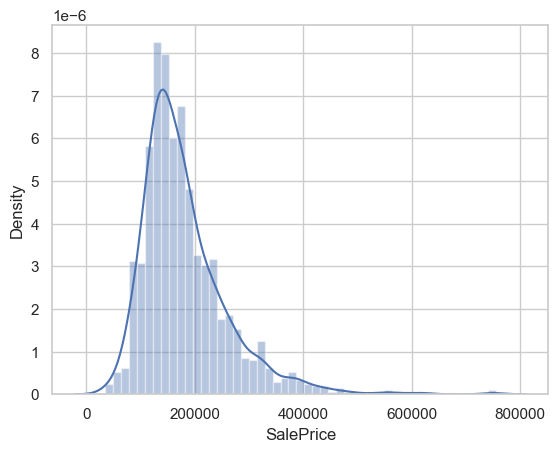

In [160]:
sns.distplot(df_train.get('SalePrice'), kde='False')
plt.show()

#### từ bản đồ distplot trên, dễ thấy rằng đặc trưng phụ thuộc 'SalePrice' bị lệch phải, nên ta sẽ phải thực hiện phép biến đổi log-chuẩn trên đặc trưng này.

## 2.1 khảo sát mối quan hệ giữa đặc trưng (feature) và giá nhà (SalePrice):


#### Trước khi vào chi tiết các cột, chúng tôi có một phương pháp rất hữu dụng để phát hiện các giá trị bất thường (Outliers) được gọi là Z-score method. Ví dụ với cột LotArea như sau

In [161]:
import pandas as pd
from scipy import stats

z_scores = pd.Series(stats.zscore(df_train['LotArea']), index=df_train.index)
z_scores.sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

Về Z-score: Z–score cho biết một giá trị lệch bao nhiêu độ lệch chuẩn trung binh. </br>
Công thức: </br>
				        *Z = (X-μ)/σ* </br>
**Trong đó:** </br>
* X: giá trị hiện tại </br>
* μ: trung bình cột </br>
* σ: độ lệch chuẩn </br>
    
**Ý nghĩa:** </br>
* Z ≈ 0 → giá trị nằm gần trung bình (bình thường). </br>
* Z = 2 → giá trị cao hơn trung bình 2 độ lệch chuẩn. </br>
* Z = -2 → giá trị thấp hơn trung bình 2 độ lệch chuẩn. </br>
* |Z| > 3 → thường được xem là outlier.
=> 10 giá trị có outliers lớn nhất ở cột LotArea như ví dụ ở trên đều có thể loại bỏ

Tuy nhiên Z-score chỉ hoạt động chính xác khi dữ liệu phân bố chuẩn (normal distribution). Nhưng nhiều feature trong dataset (đặc biệt là trong nhà ở, giá, diện tích, thu nhập...) lại lệch phải hoặc lệch trái mạnh, khiến Z-score đánh dấu nhầm outlier. </br>
→ Kết quả: loại bỏ cả những điểm thực ra hợp lý, chỉ là nằm ở vùng đuôi của phân phối lệch. Model học kém khả năng tổng quát, và điểm score cũng vì thế mà giảm vì mất dữ liệu đa dạng. Vậy nên chúng tôi sẽ không sử dụng cách này

## 2.2 Tổng quan hoá các giá trị bất thường (Outliers) xuất hiện trong các cột:

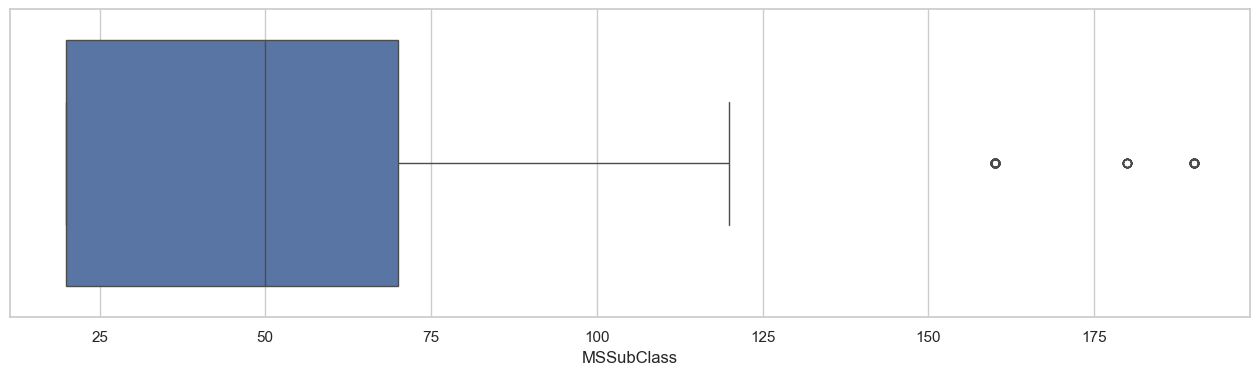

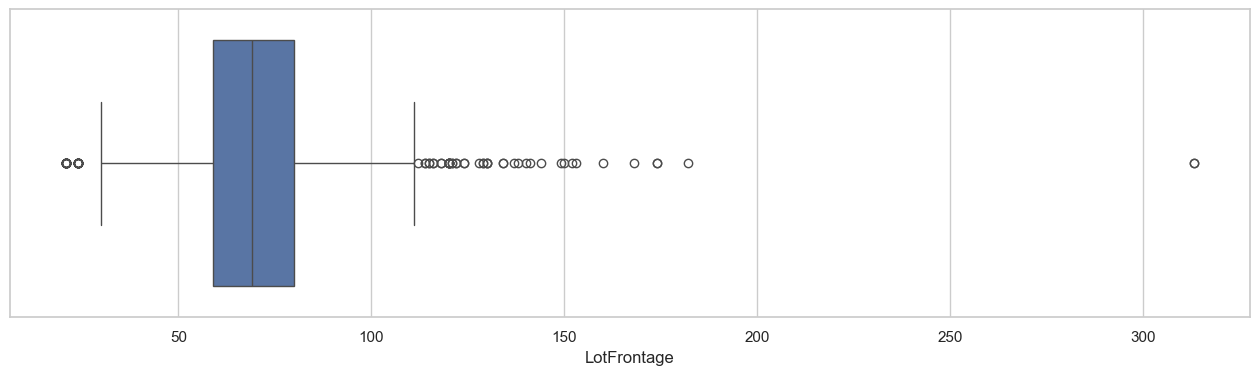

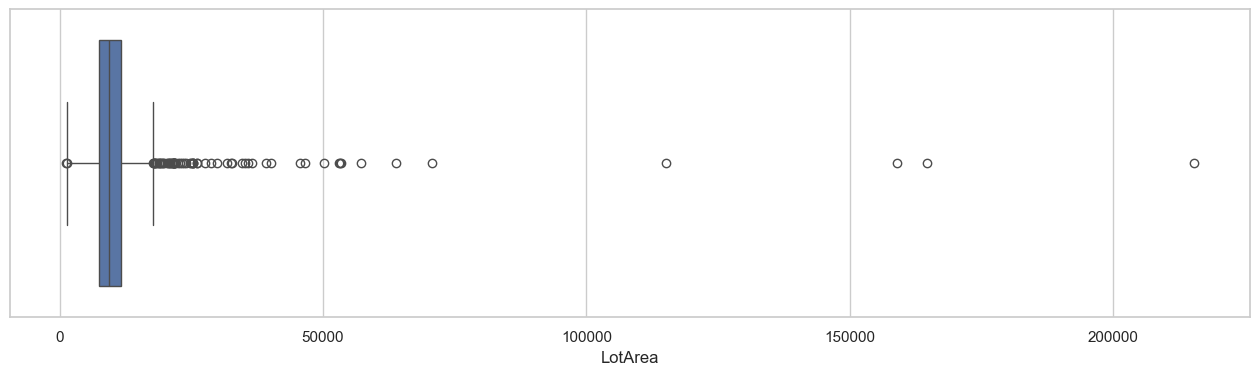

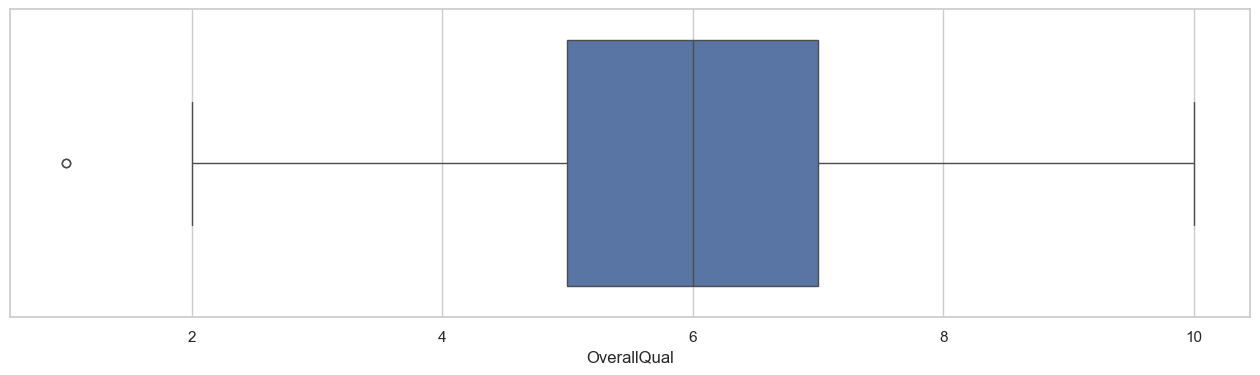

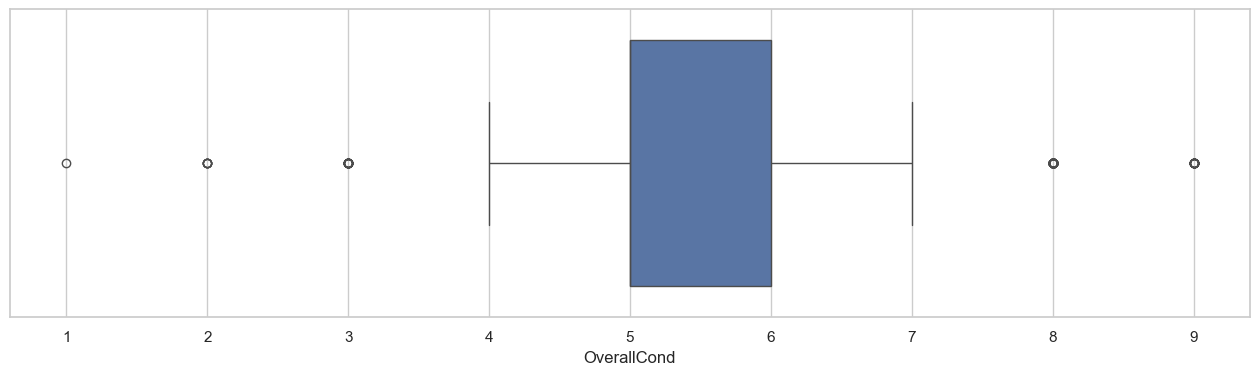

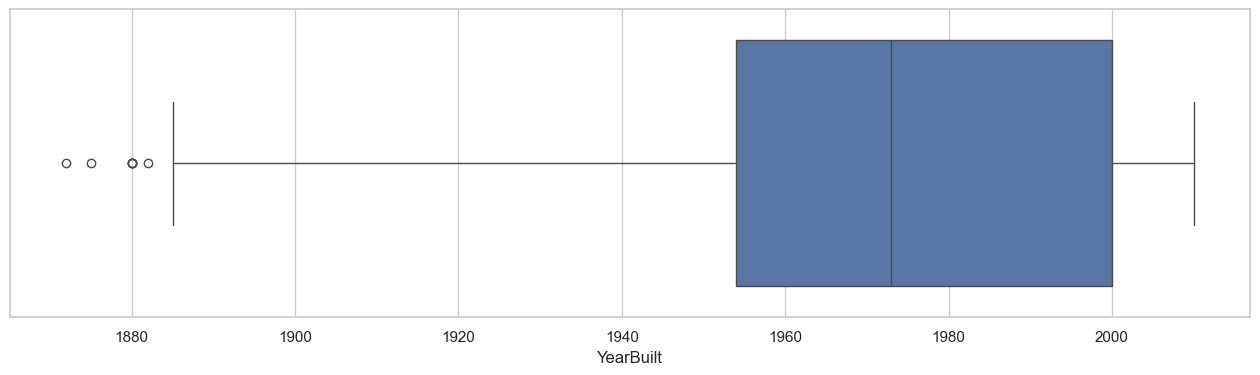

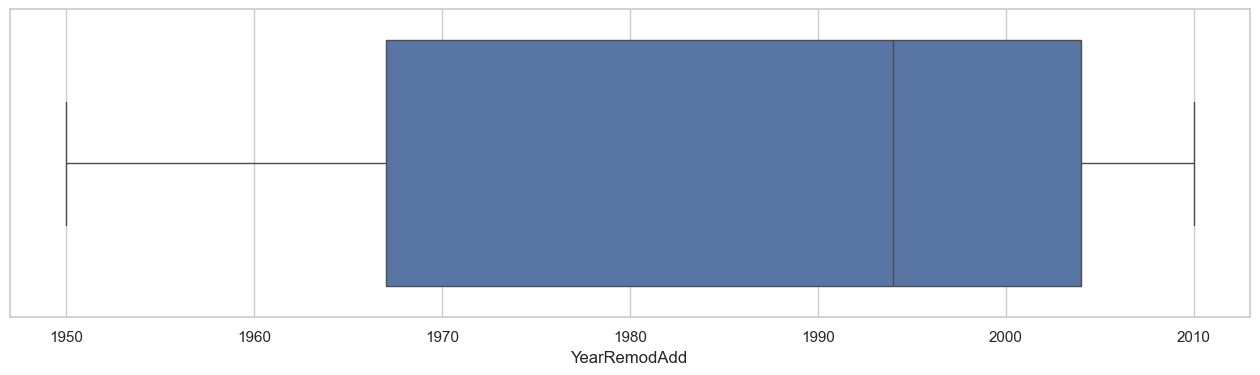

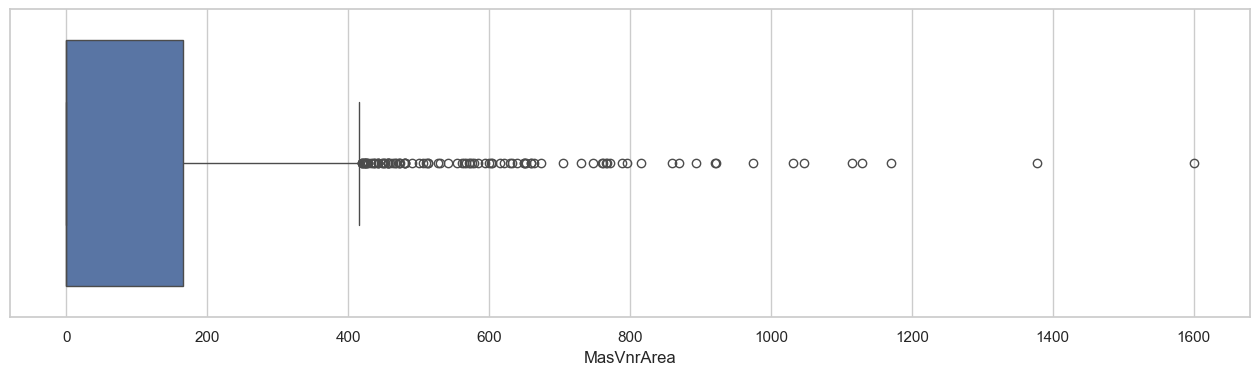

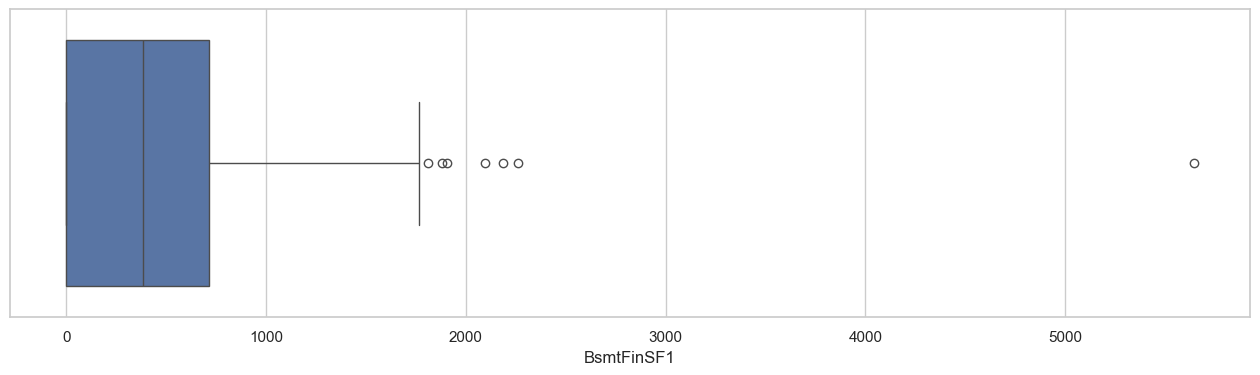

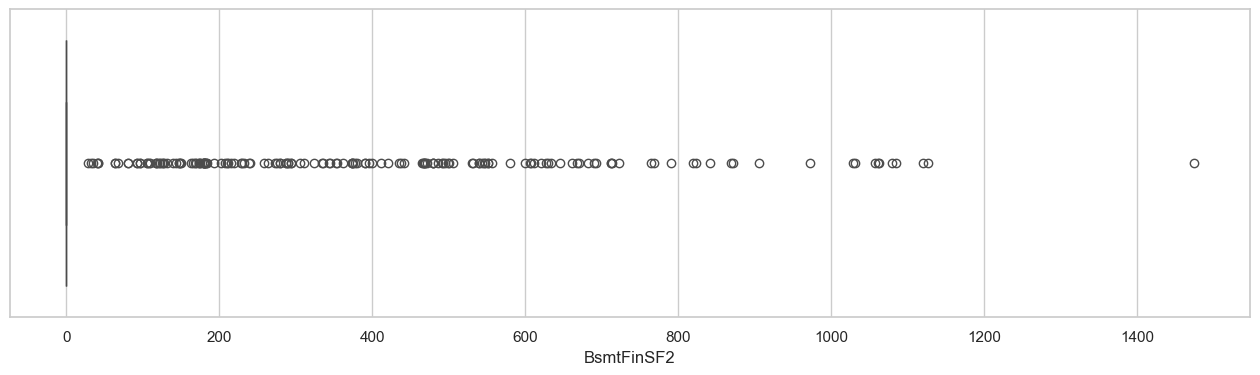

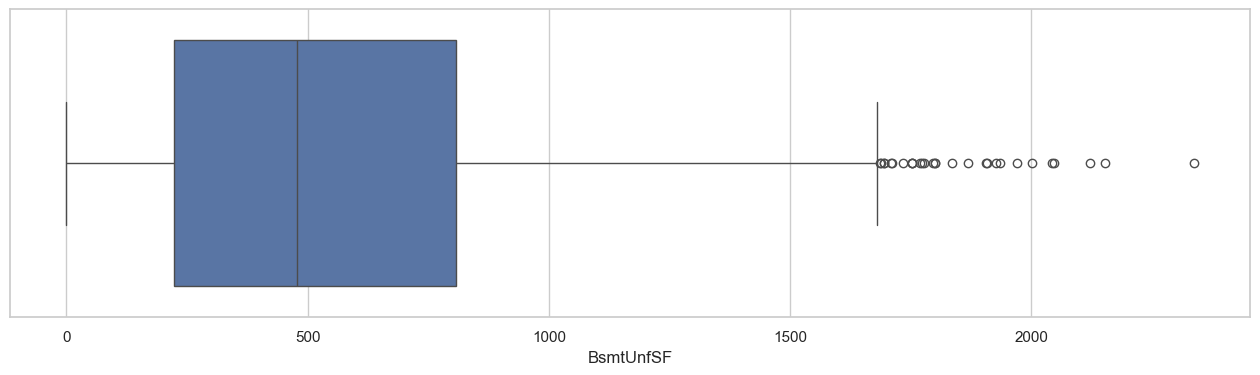

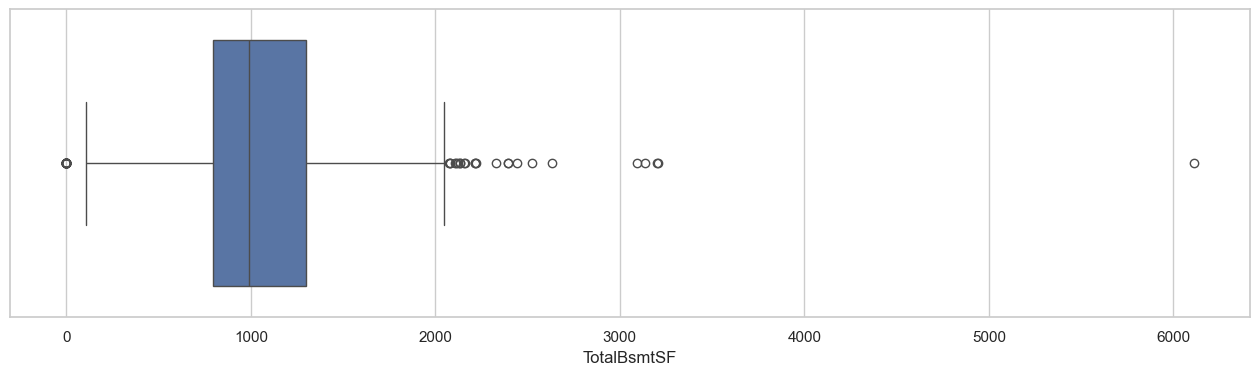

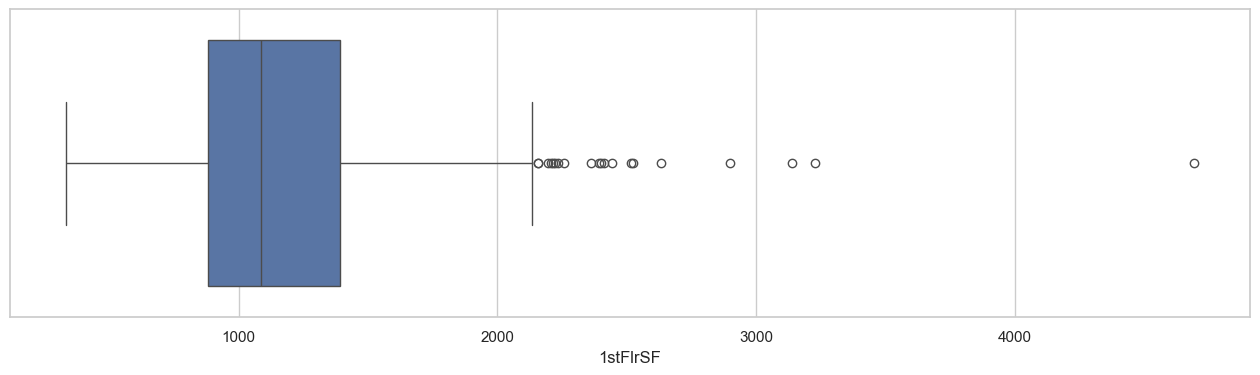

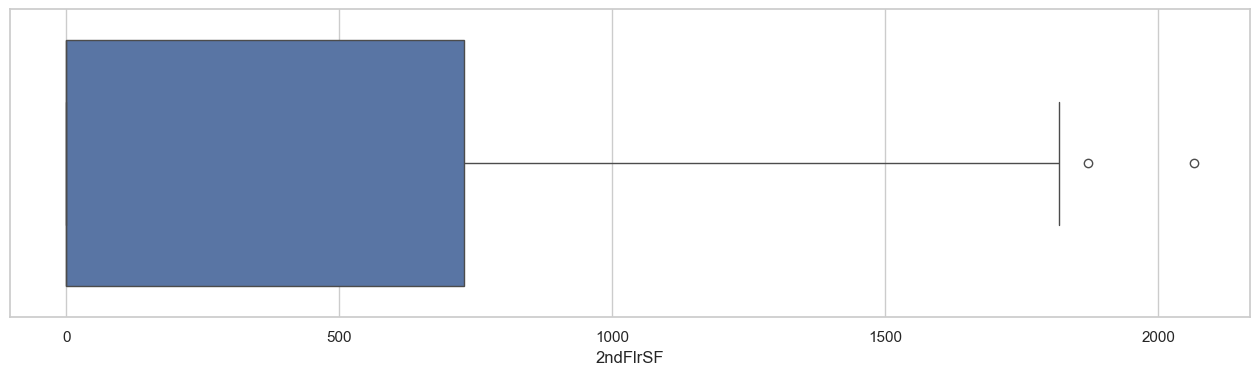

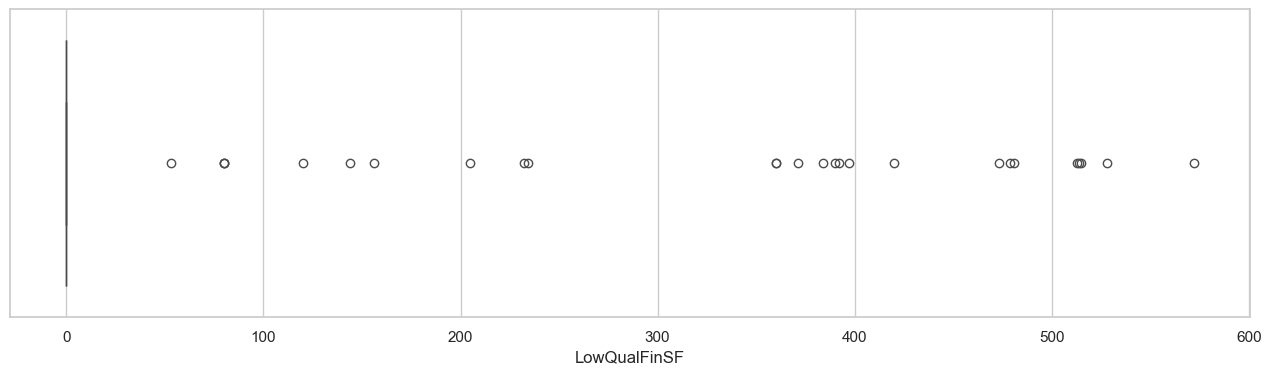

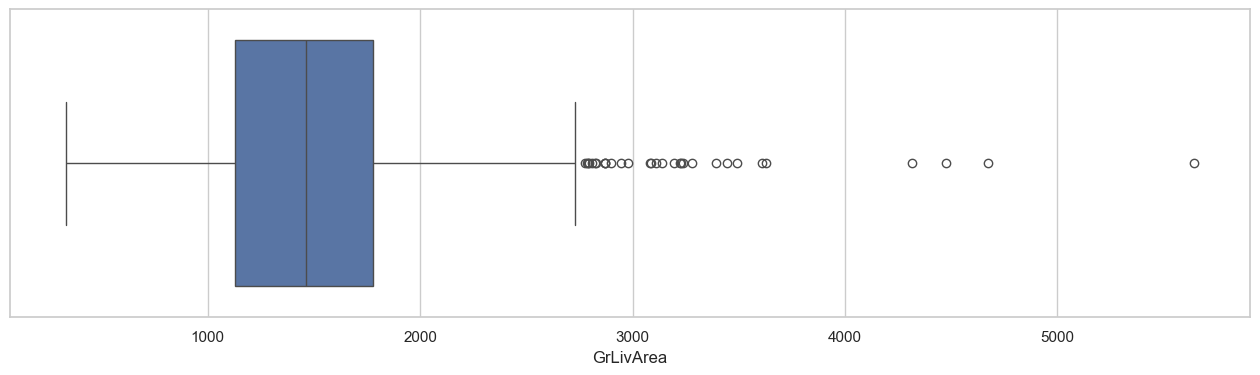

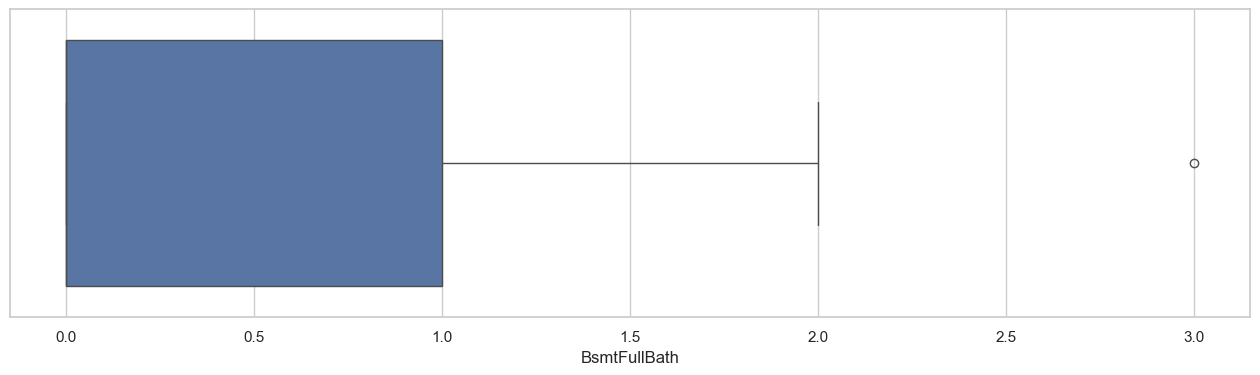

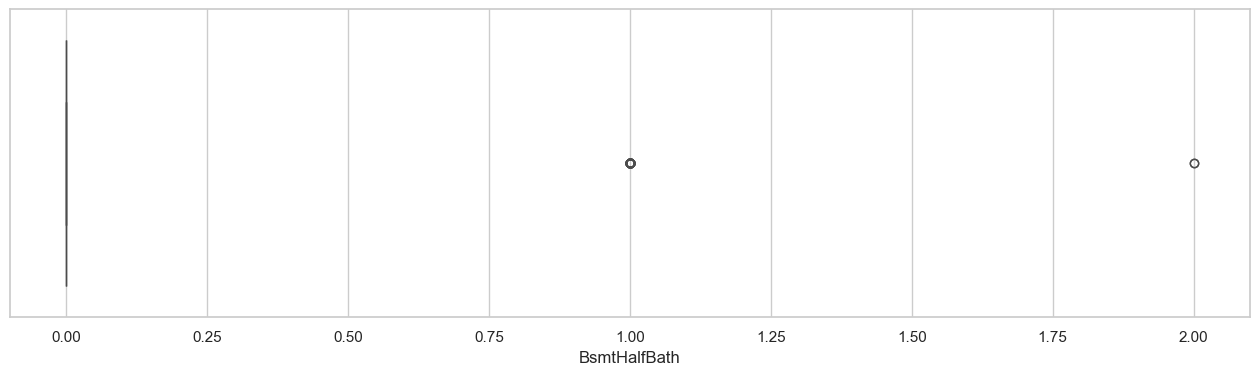

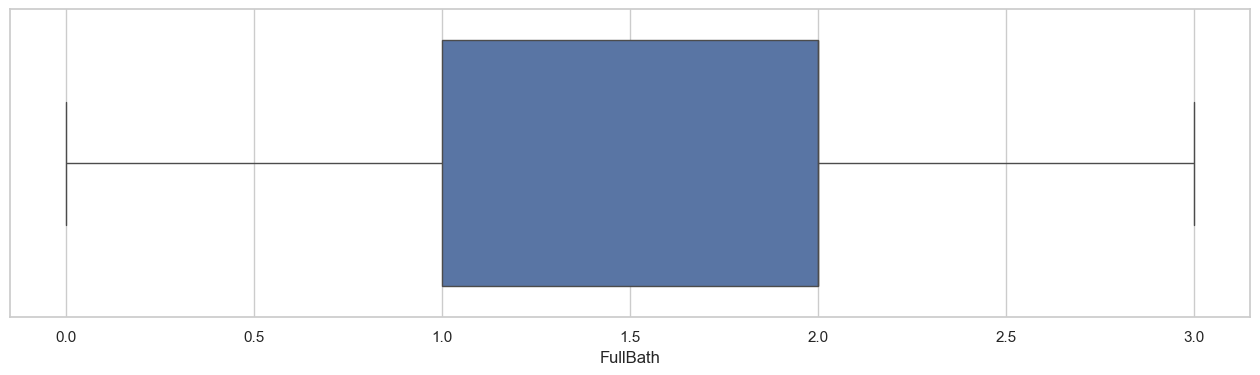

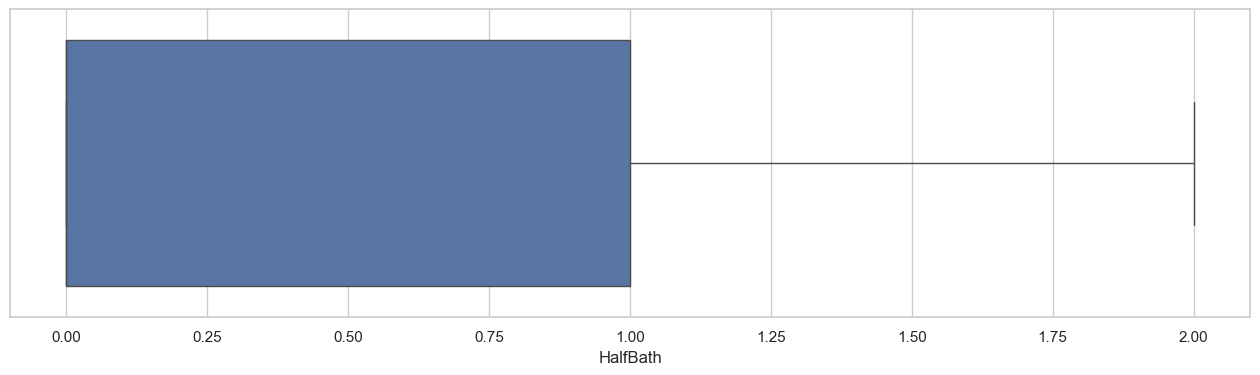

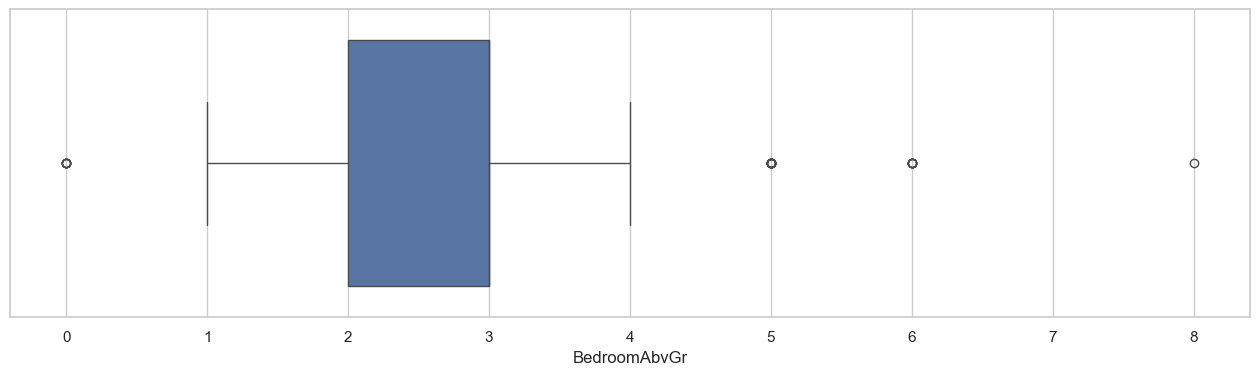

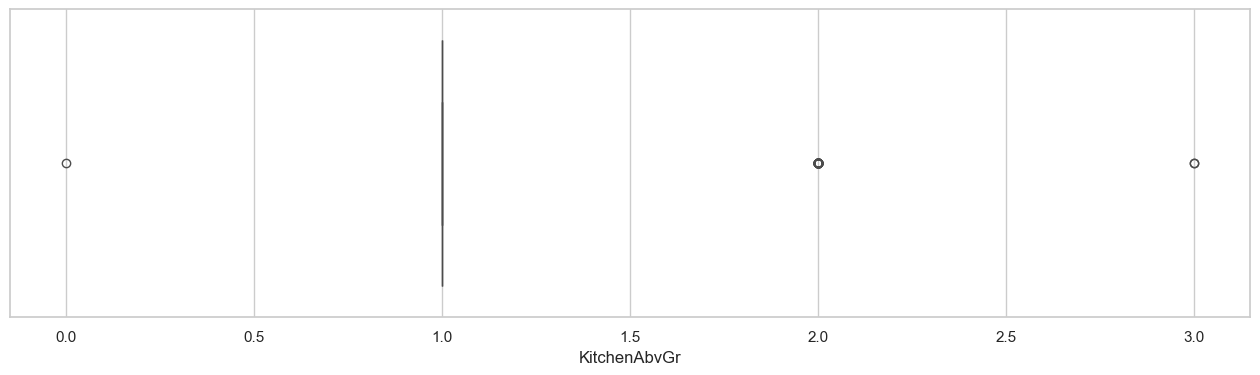

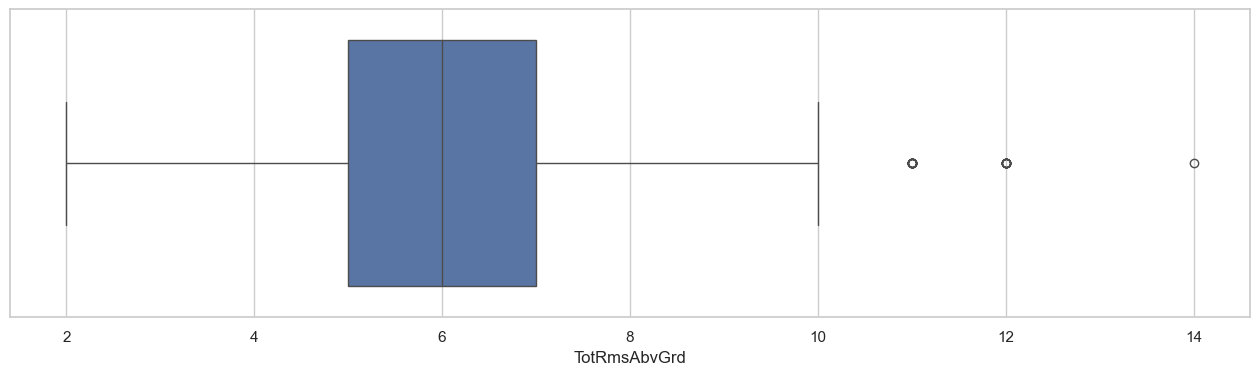

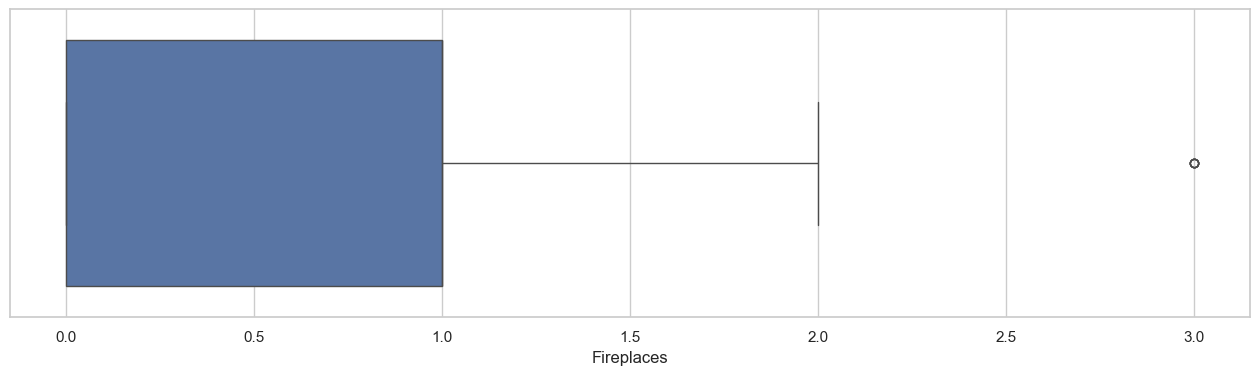

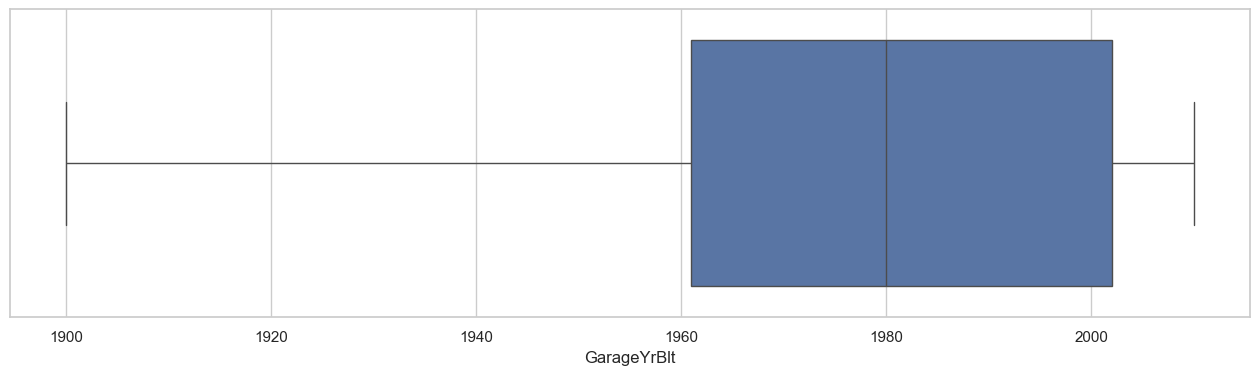

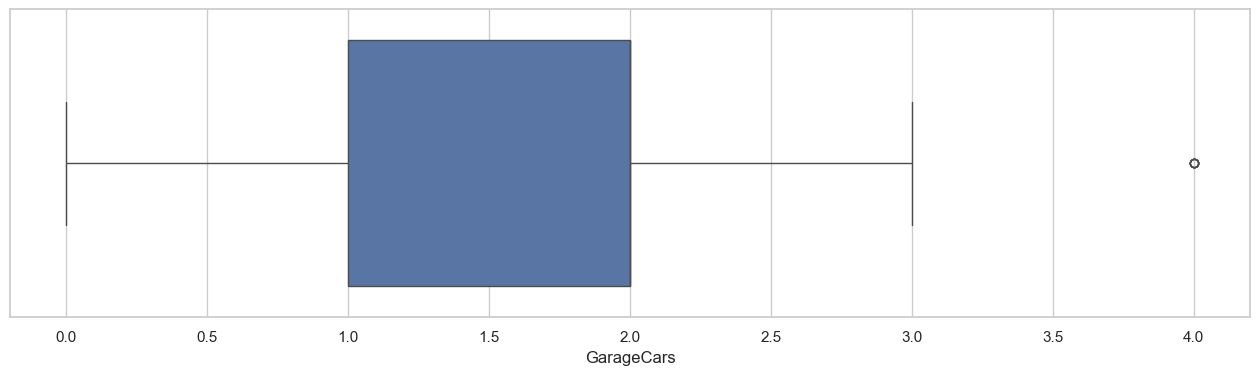

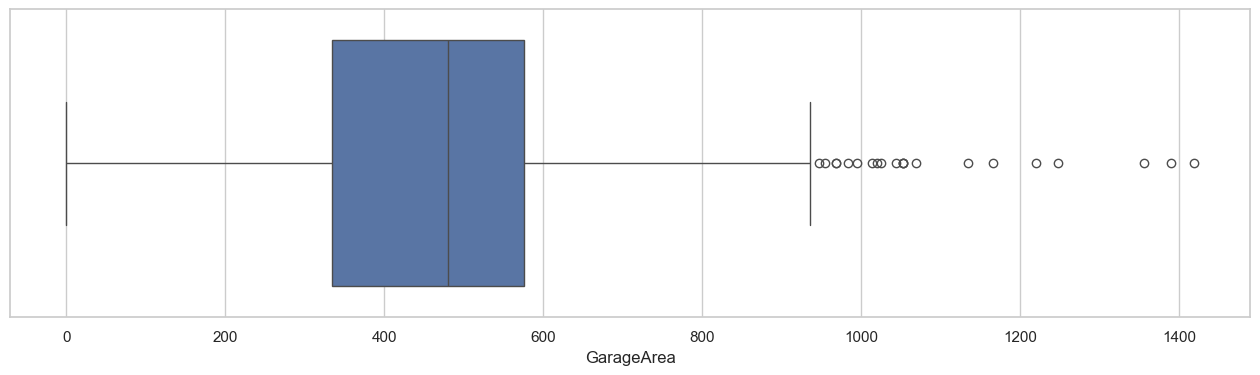

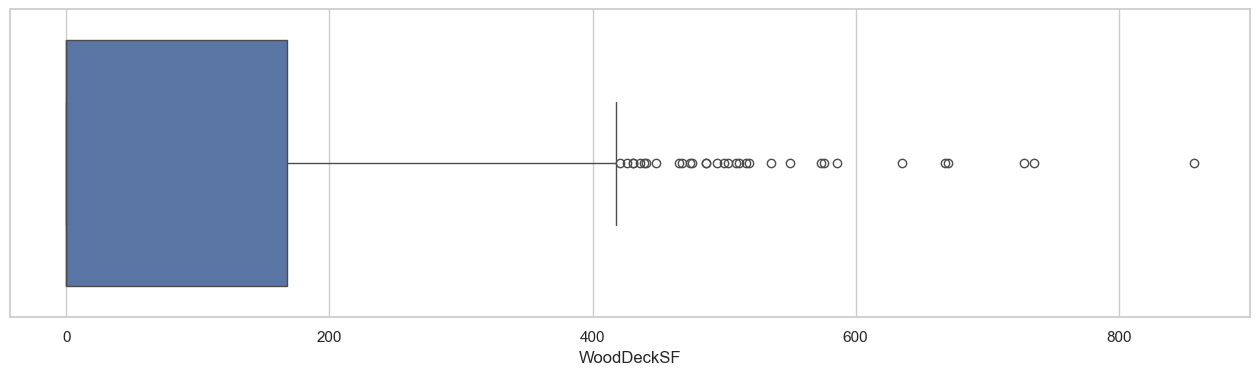

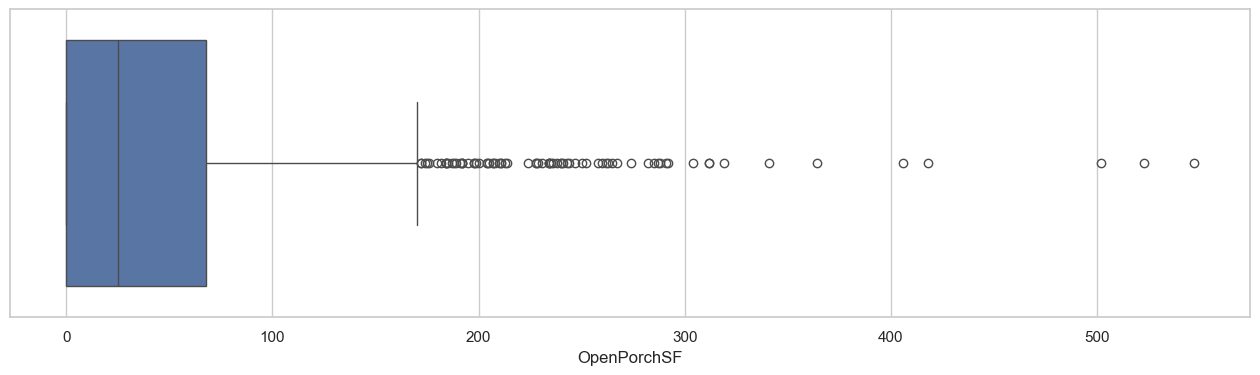

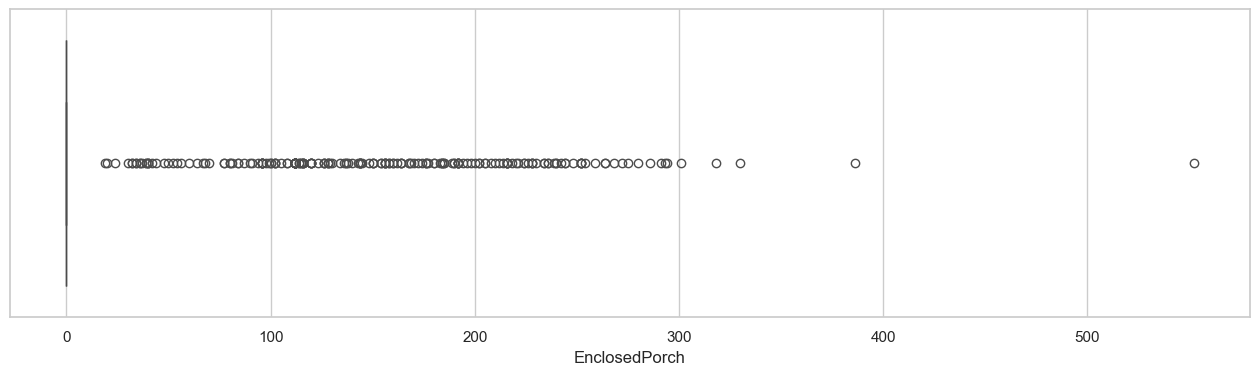

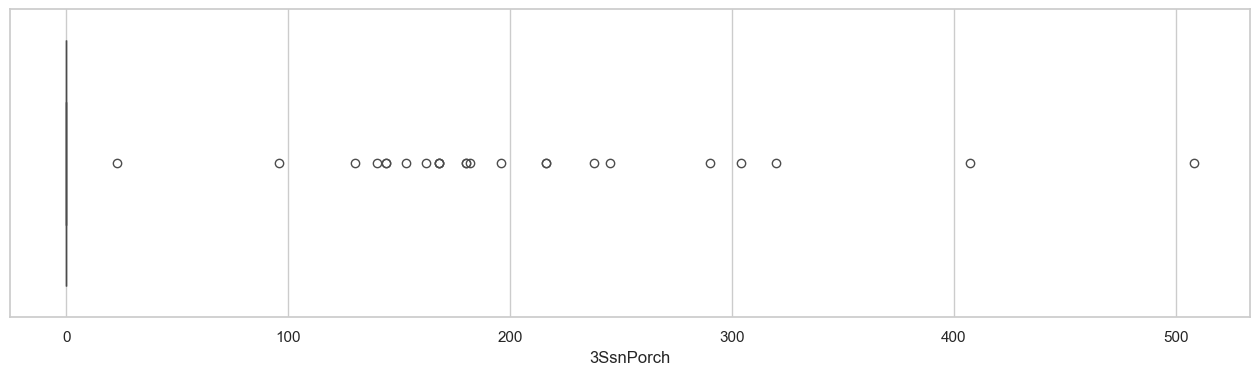

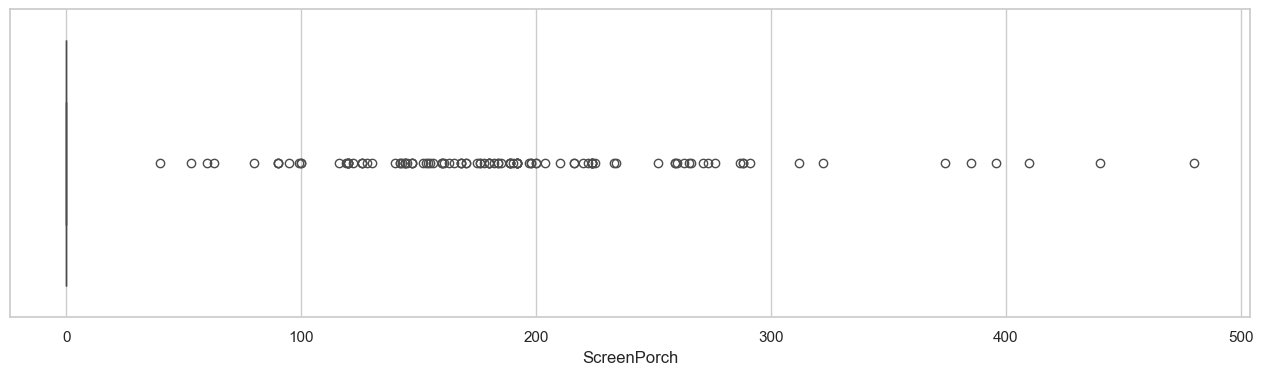

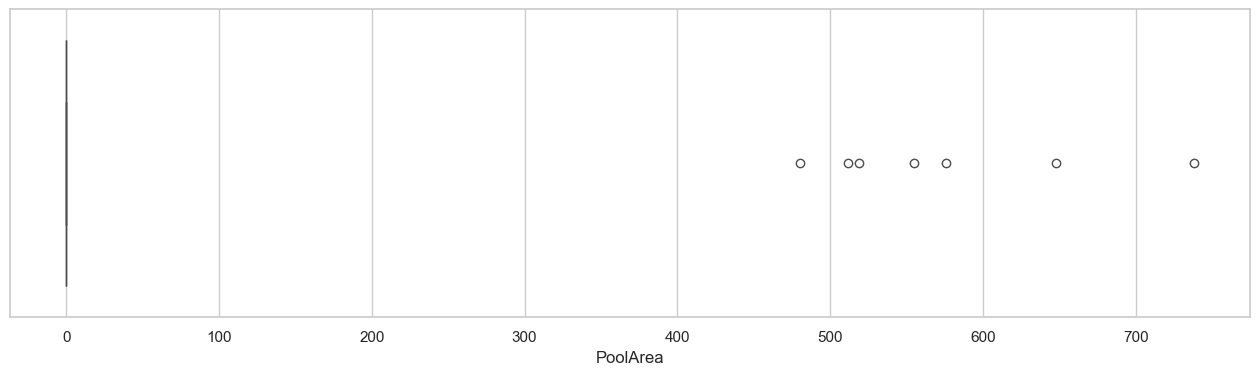

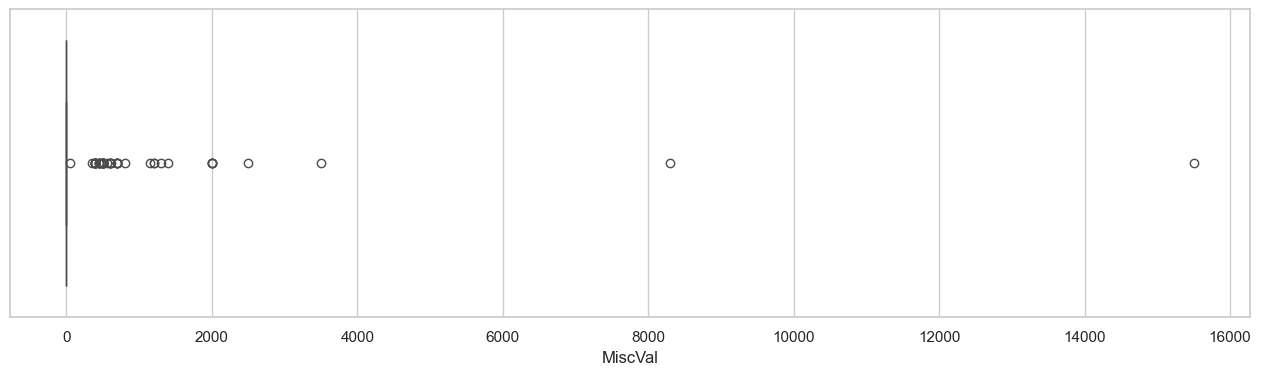

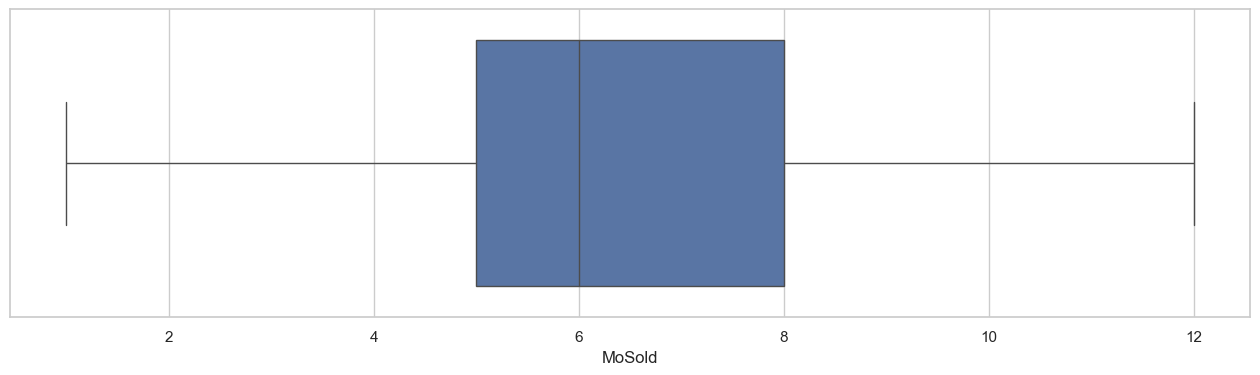

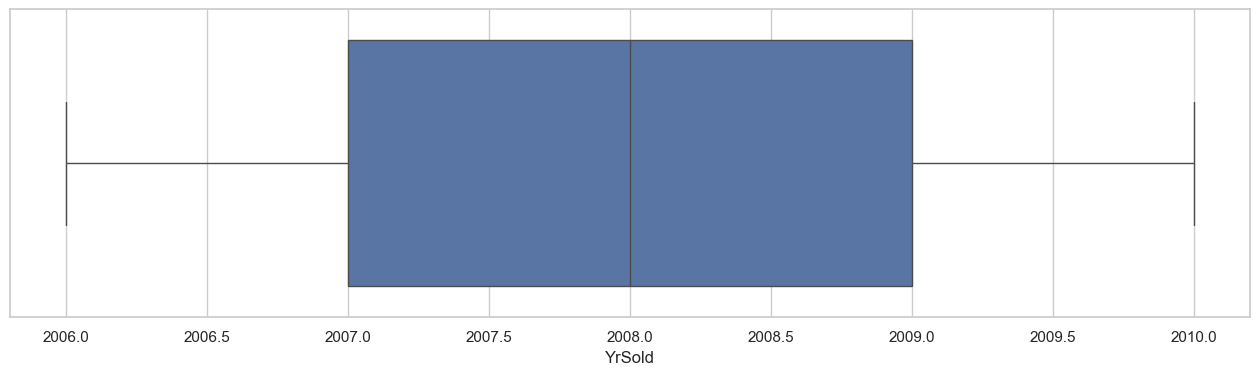

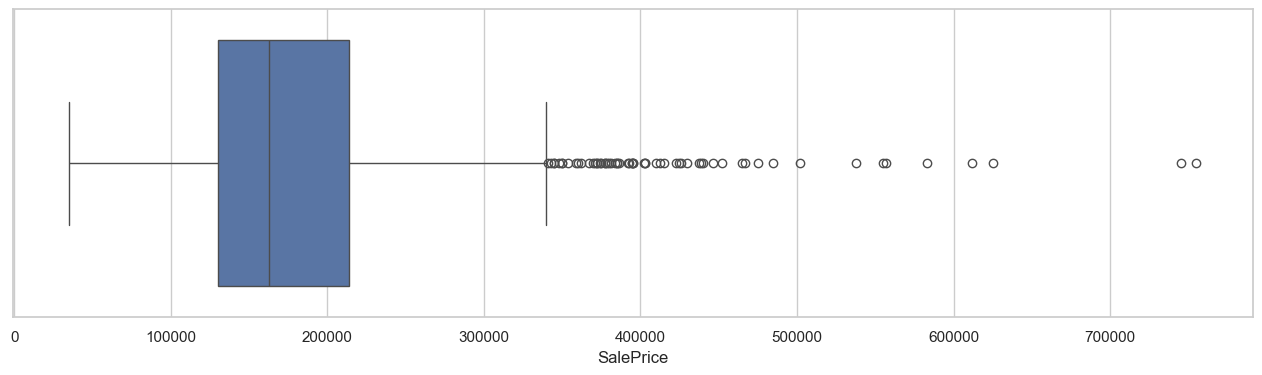

In [162]:
numerical_df = df_train.select_dtypes(exclude='object')  
numerical_df = numerical_df.drop(['Id'], axis=1)  

for column in numerical_df:  
    plt.figure(figsize=(16, 4))  
    sns.set_theme(style='whitegrid')  
    sns.boxplot(numerical_df[column], orient='h')  
    plt.xlabel(column)  
    plt.show()
# các giá trị bất thường tương ứng các chấm nhỏ nằm cách xa hẳn so với mặt bằng chung các dữ liệu khác 

## 2.3 Sử dụng biểu đồ PLT để kiểm tra các giá trị bất thường (Outliers):
Biểu đồ phân tán (Scatter Plot) được sử dụng trong quá trình này nhằm quan sát mối quan hệ giữa biến độc lập (diện tích nhà, diện tích tầng, diện tích tầng hầm, ...) và biến mục tiêu *SalePrice*. Loại biểu đồ này giúp dễ dàng phát hiện các điểm dữ liệu bất thường (outliers) một cách rõ rang nhất, các giá trị bất thường nằm lệch khỏi xu hướng chung giữa hai biến. Việc trực quan hóa bằng scatter plot không chỉ cho thấy giá trị cực trị, mà còn giúp đánh giá xem các điểm đó có hợp lý trong tương quan với giá bán hay không, từ đó hỗ trợ quyết định loại bỏ các giá trị gây sai lệch mô hình hồi quy.

### 2.3.1 Cột MSSubClass (loại công trình xây dựng)

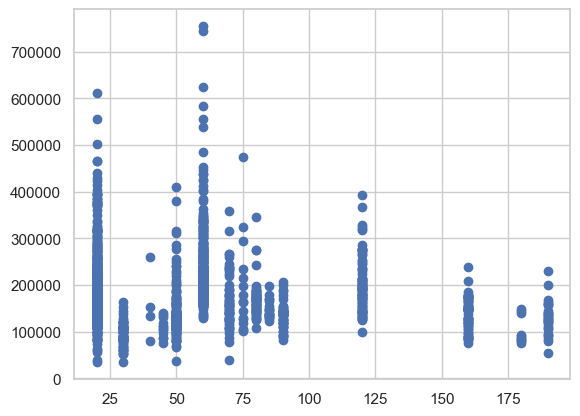

In [163]:
# cột MSSubClass
plt.scatter(x='MSSubClass', y='SalePrice', data=df_train)

=> cột này không có

### 2.3.2 cột LotFrontage (chiều dài mặt tiền - feet)

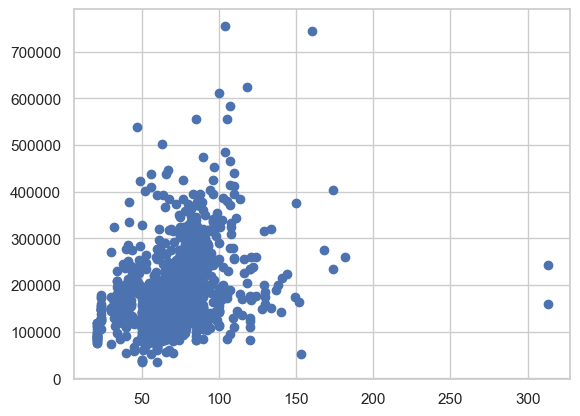

In [164]:
# cột LotFrontage
plt.scatter(x='LotFrontage', y='SalePrice', data=df_train)

Từ biểu đồ cho thấy phần lớn các điểm dữ liệu tập trung trong khoảng LotFrontage từ 40 đến 100 feet, với giá nhà dao động chủ yếu trong khoảng 100,000 – 400,000 USD. Điều này nói lên rằng các ngôi nhà trong bộ dữ liệu có mặt tiền vừa phải và giá tương đối đồng đều theo xu hướng. </br>
Tuy nhiên, có hai điểm dữ liệu nằm tách biệt hẳn khỏi cụm chính (với LotFrontage > 300). Hai điểm này không tuân theo xu hướng chung, biểu thị các giá trị ngoại lệ (outliers) vì vậy có thể là lỗi nhập liệu hoặc là những trường hợp đặc biệt hiếm gặp. Ta loại bỏ hai giá trị này.

#### cụ thể hai giá trị cần loại bỏ này:

In [165]:
df_train.query('LotFrontage > 300')
# bỏ hai giá trị có id: 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### 2.3.3 cột LotArea (Diện tích lô đất theo foot vuông)

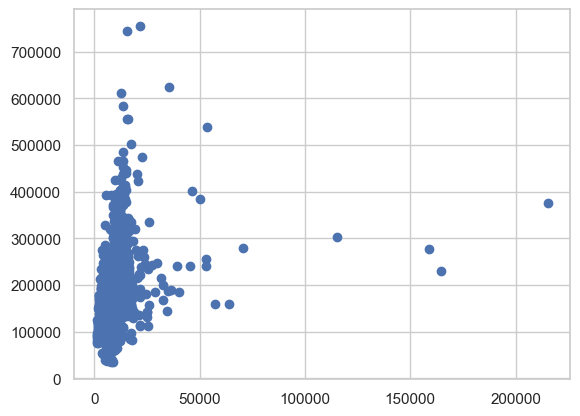

In [166]:
# cột LotArea
plt.scatter(x='LotArea', y='SalePrice', data=df_train)

từ biểu đồ này ta sẽ đánh giá các điểm rời rạc ở mức 100000 - 200000 (outliers) và một số điểm trong khoảng 50000 - 100000. Tuy nhiên để trực quan hơn chúng tôi chỉ xét các hàng có LotArea >55000

In [167]:
df_train.query('LotArea > 100000')
# dựa vào bảng phía dưới ta được các giá trị Outliers gồm các id: 250, 314, 336, 707. 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


### 2.3.4 cột OverallQual (Chất lượng vật liệu và hoàn thiện tổng thể)

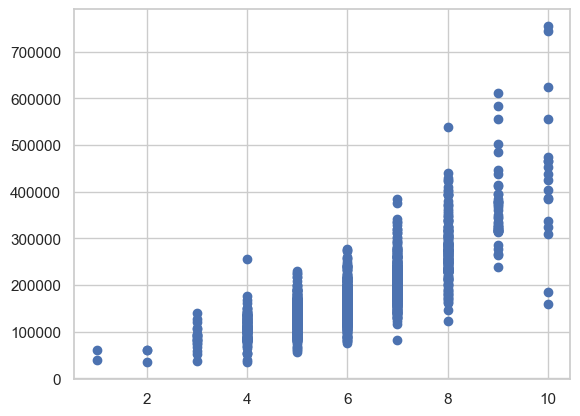

In [168]:
plt.scatter(x='OverallQual', y='SalePrice', data=df_train)

In [169]:
df_train.query('OverallQual == 10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,2392,0,0,2392,0,0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,2003.0,Fin,3,968,TA,TA,Y,248,105,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280,Unf,0,402,1682,GasA,Ex,Y,SBrkr,1742,590,0,2332,1,0,2,1,3,1,Ex,9,Typ,1,Ex,BuiltIn,2008.0,Fin,3,846,TA,TA,Y,196,134,0,0,0,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2009,2009,Hip,CompShg,CemntBd,CmentBd,BrkFace,305.0,Ex,TA,CBlock,Ex,TA,No,GLQ,1436,Unf,0,570,2006,GasA,Ex,Y,SBrkr,2020,0,0,2020,1,0,2,1,3,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,900,TA,TA,Y,156,54,0,0,0,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008.0,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,

### 2.3.5 cột OverallCond (Đánh giá tình trạng tổng thể)

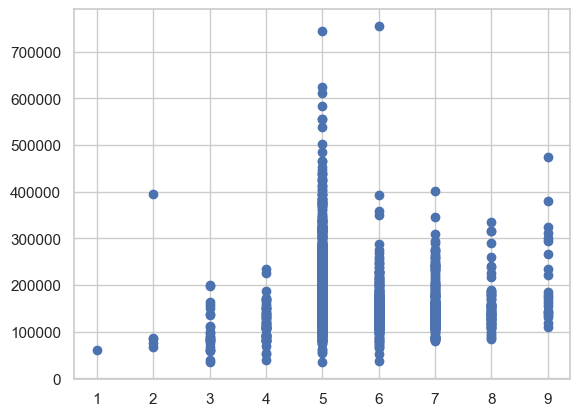

In [170]:
plt.scatter(x='OverallCond', y='SalePrice', data=df_train)

In [171]:
df_train.query('OverallCond == 2')
# 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,NaN,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445,Unf,0,411,1856,GasA,Ex,Y,SBrkr,1856,0,0,1856,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3,834,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,2,1920,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Fa,BrkTil,Fa,Po,No,Unf,0,Unf,0,961,961,GasA,Gd,Y,Mix,1077,0,0,1077,0,0,1,0,2,1,TA,6,Maj2,0,NaN,Detchd,1920.0,Unf,1,338,Po,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,NaN,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,NaN,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [172]:
df_train.query('OverallCond == 5')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex

Trong trường hợp các cột có quá nhiều giá trị sau khi khoanh vùng (ví dụ cột OverallCond số 5 này có quá nhiều dòng nên chúng tôi phải thêm điều kiện để khoanh vùng cụ thể giá trị bất thường

In [173]:
df_train.query('OverallCond == 5 & SalePrice > 700000')
# id 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [174]:
df_train.query('OverallCond == 6 & SalePrice > 700000')
# id 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


### 2.3.6 cột YearBuilt (Ngày xây dựng)

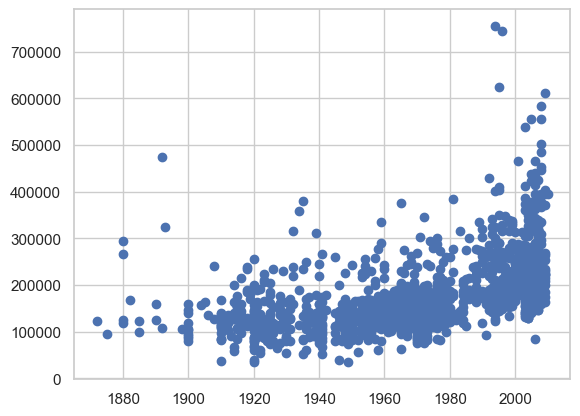

In [175]:
plt.scatter(x='YearBuilt', y='SalePrice', data=df_train)

In [176]:
df_train.query('YearBuilt < 1900 & SalePrice > 400000')
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


### 2.3.7 cột YearRemodAdd (Ngày cải tạo)

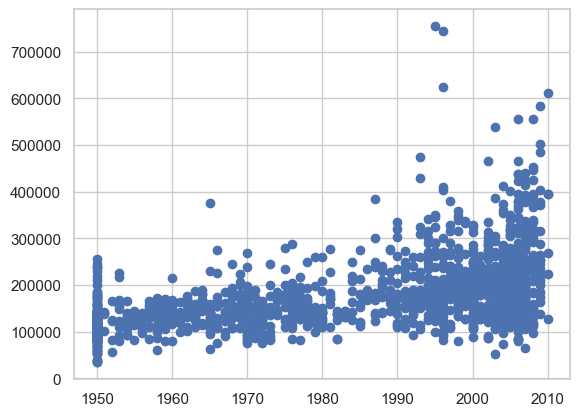

In [177]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=df_train)

In [178]:
df_train.query('YearRemodAdd < 1970 & SalePrice > 300000')
# id 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


### 2.3.8 cột MasVnrArea (Diện tích ốp trang trí tường - foot vuông)

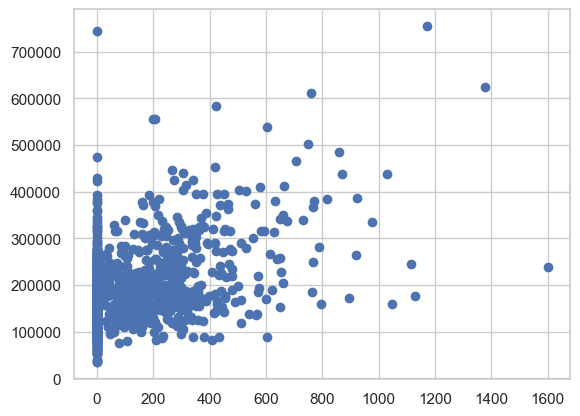

In [179]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=df_train)

In [180]:
df_train.query('MasVnrArea > 1550')
# id 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


### 2.3.9 cột BsmtFinSF1 (Diện tích hoàn thiện loại 1 - foot vuông)

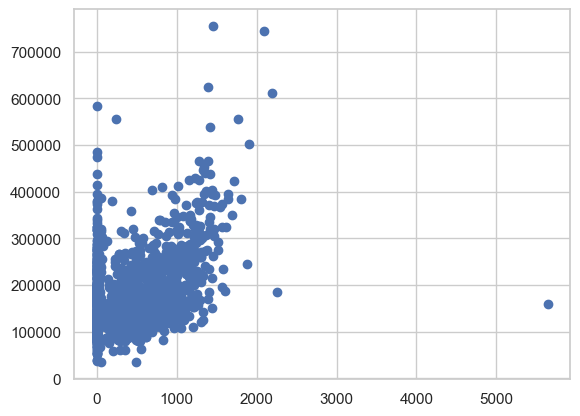

In [181]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=df_train)

In [182]:
df_train.query('BsmtFinSF1 > 5000')
# id 1299 (đã được loại bỏ từ lúc xét LotFrontage)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### 2.3.10 cột BsmtFinSF2 (Diện tích hoàn thiện loại 2 - foot vuông)


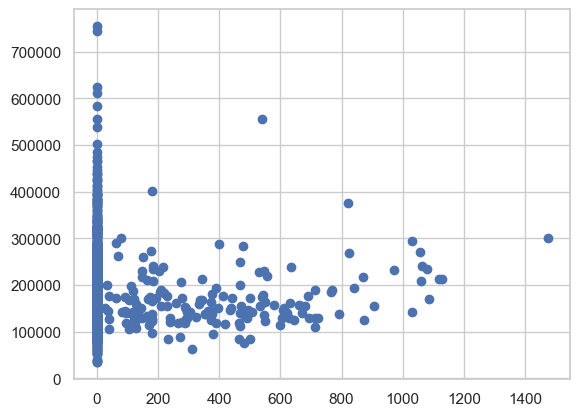

In [183]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df_train)

In [184]:
df_train.query('BsmtFinSF2 > 1400 & SalePrice > 200000')
# id 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28,ALQ,1474,0,1502,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1987.0,Fin,2,576,TA,TA,Y,201,96,0,0,0,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


### 2.3.11 cột BsmtUnfSF (Diện tích chưa hoàn thiện của tầng hầm - foot vuông)

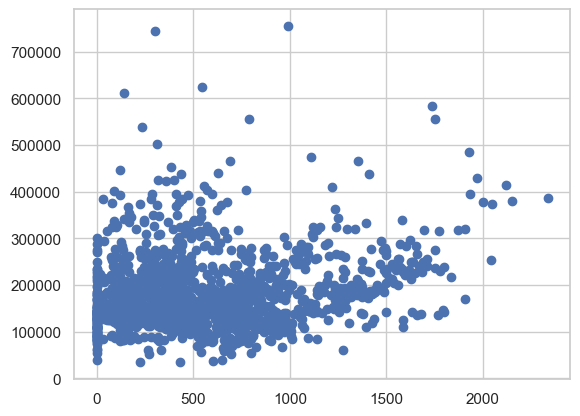

In [185]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=df_train)

### 2.3.12 cột TotalBsmtSF (Tổng diện tích tầng hầm - foot vuông)

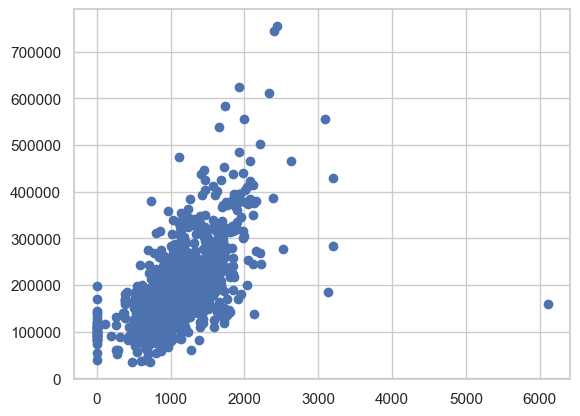

In [186]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df_train)

In [187]:
df_train.query('TotalBsmtSF > 6000')
# id 1299 (đã loại bỏ từ trước)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### 2.3.13 cột 1stFlrSF (Diện tích tầng 1 - foot vuông)

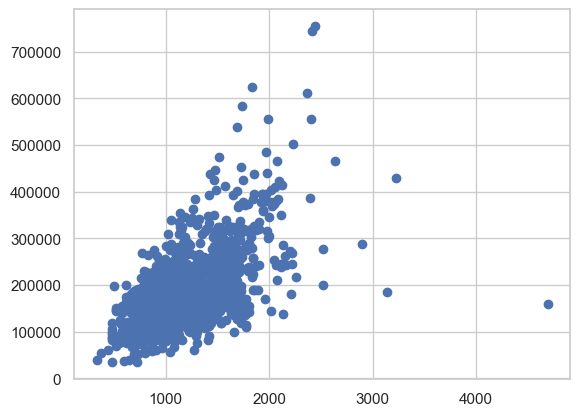

In [188]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=df_train)

In [189]:
df_train[df_train['1stFlrSF'] > 4000]
# id 1299 (đã loại bỏ từ trước)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### 2.3.14 cột 2ndFlrSF (Diện tích tầng 2 - foot vuông)

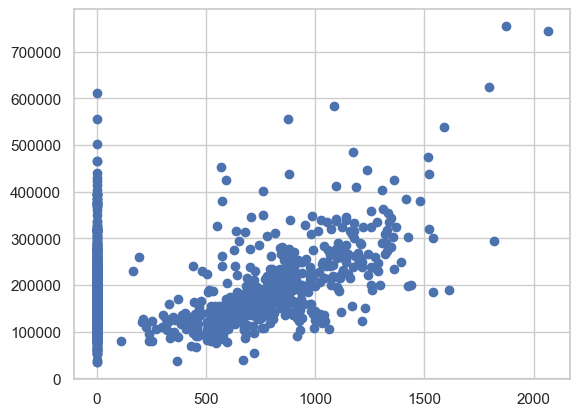

In [190]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=df_train)

### 2.3.15 cột LowQualFinSF (Diện tích hoàn thiện chất lượng thấp - xét tất cả các tầng)

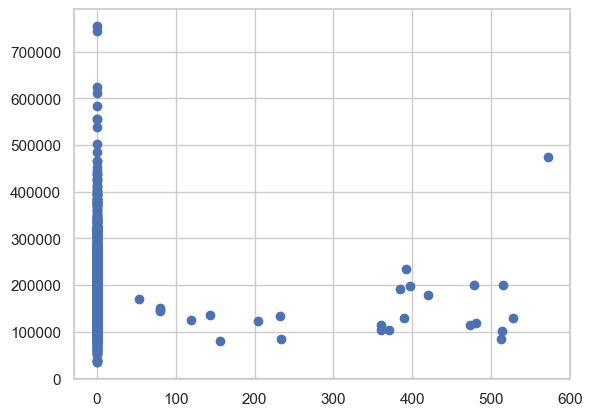

In [191]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=df_train)

In [192]:
df_train.query('LowQualFinSF > 500 & SalePrice > 400000')
# id 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


### 2.3.16 cột GrLivArea (Diện tích sinh hoạt trên mặt đất - foot vuông)


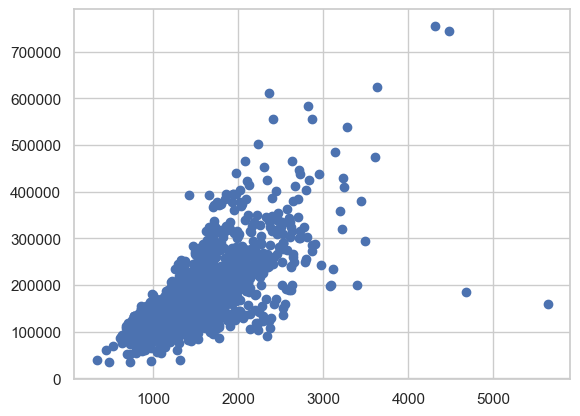

In [193]:
plt.scatter(x='GrLivArea', y='SalePrice', data=df_train)

In [194]:
df_train.query('GrLivArea > 4500')
# id 524 và 1299 (đã loại bỏ từ trước)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### 2.3.17 cột BsmtFullBath (Phòng tắm đầy đủ trong tầng hầm)

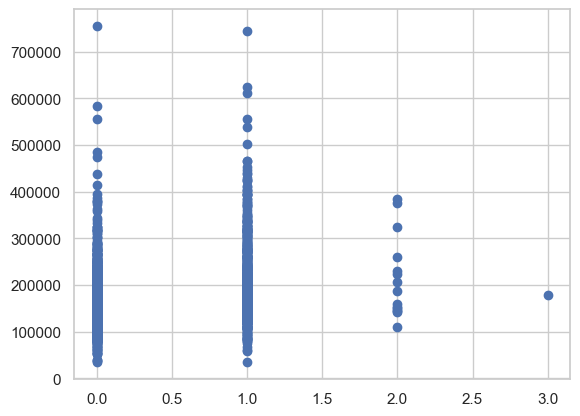

In [195]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=df_train)

In [196]:
df_train.query('BsmtFullBath == 3')
# id 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


### 2.3.18 cột BsmtHalfBath (Phòng vệ sinh nhỏ trong tầng hầm)

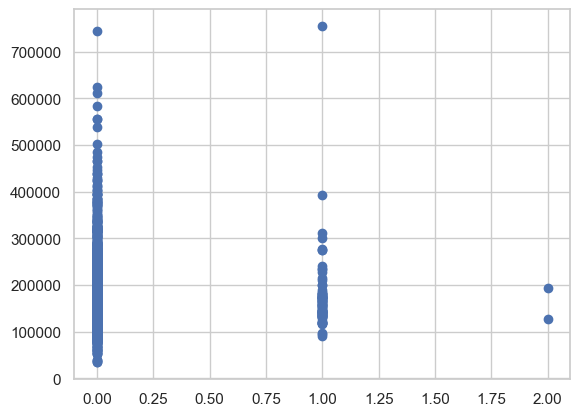

In [197]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=df_train)

In [198]:
df_train.query('BsmtHalfBath == 1 & SalePrice > 700000')
# id 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [199]:
df_train.query('BsmtHalfBath == 2')
# id 598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,TA,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


### 2.3.19 cột FullBath (Phòng tắm đầu đủ trên tầng)

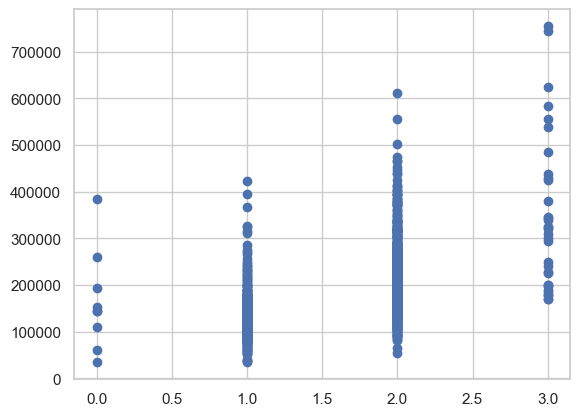

In [200]:
plt.scatter(x='FullBath', y='SalePrice', data=df_train)

### 2.3.20 cột HalfBath (Phòng tắm nhỏ trên tầng)

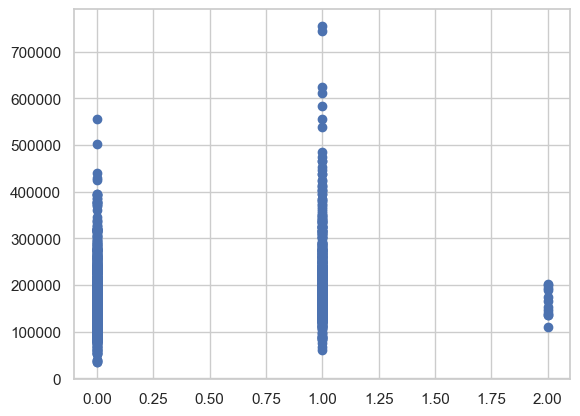

In [201]:
plt.scatter(x='HalfBath', y='SalePrice', data=df_train)

### 2.3.21 cột TotRmsAbvGrd (Tổng số phòng trên tầng - không bao gồm phòng tắm)


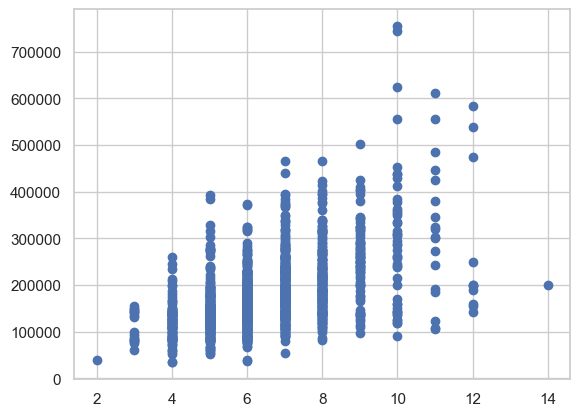

In [202]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df_train)

In [203]:
df_train.query('TotRmsAbvGrd == 14')
# id 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


### 2.3.22 cột Fireplaces (Số lò sưởi)

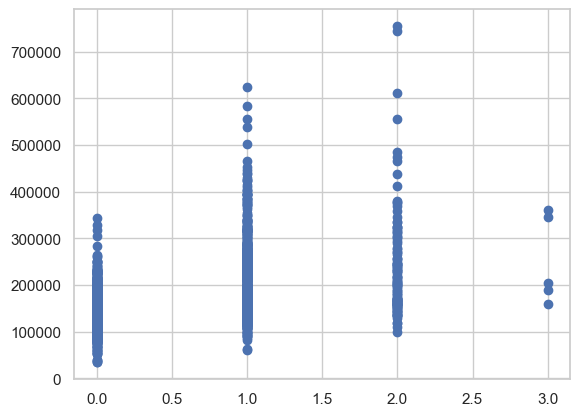

In [204]:
plt.scatter(x='Fireplaces', y='SalePrice', data=df_train)

### 2.3.23 cột GarageYrBlt (Năm xây dựng nhà để xe)


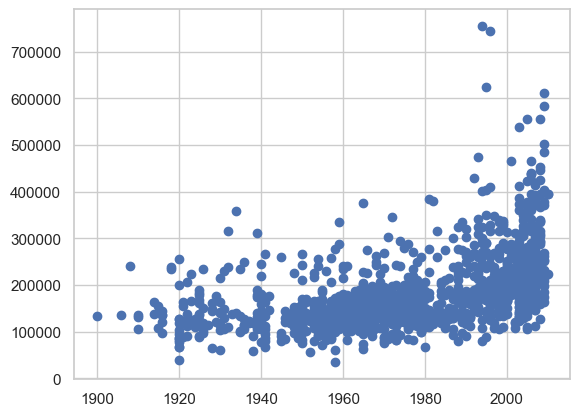

In [205]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df_train)

### 2.3.24 cột GarageCars (Sức chứa nhà để xe - số ô tô)

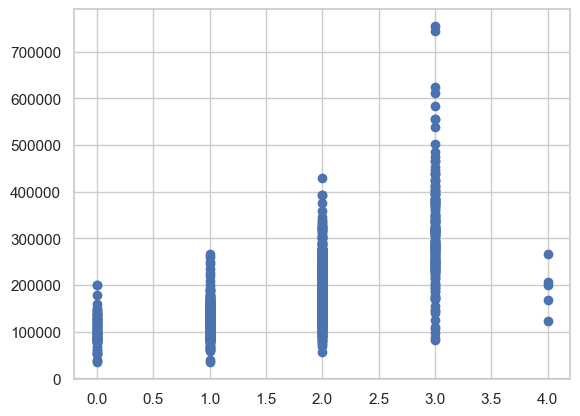

In [206]:
plt.scatter(x='GarageCars', y='SalePrice', data=df_train)

### 2.3.25 cột GarageArea (Diện tích nhà để xe - foot vuông)


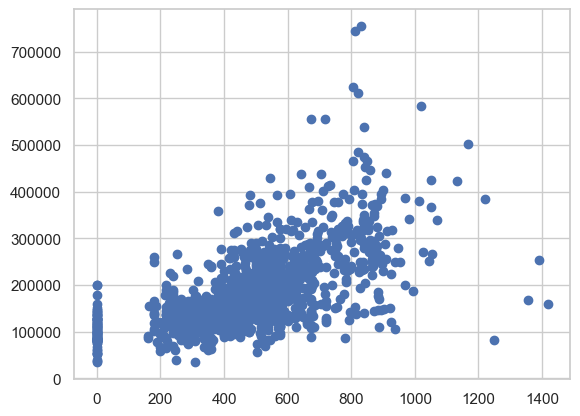

In [207]:
plt.scatter(x='GarageArea', y='SalePrice', data=df_train)

In [208]:
df_train.query('GarageArea > 1200')
# id 1299 (đã được loại bỏ)
# id 1062

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### 2.3.26 cột WoodDeckSF (Diện tích sàn gỗ - foot vuông)


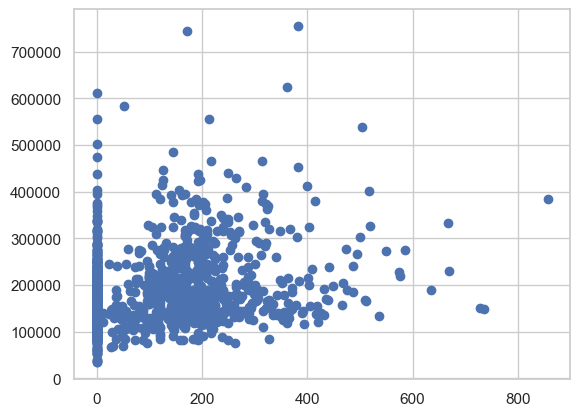

In [209]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df_train)

In [210]:
df_train.query('WoodDeckSF > 800')
# id 54

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,NaN,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


### 2.3.27 cột OpenPorchSF (Diện tích hiên mở - foot vuông)

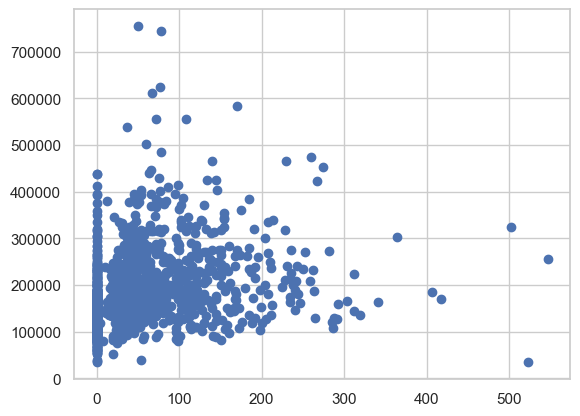

In [211]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df_train)

In [212]:
df_train.query('OpenPorchSF > 500')
# id 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


### 2.3.28 cột EnclosedPorch (Diện tích hiên kín - foot vuông)


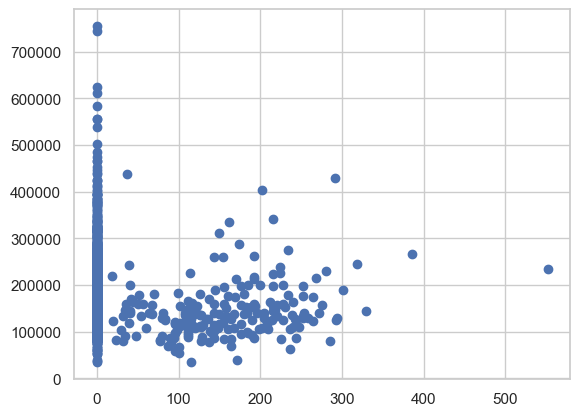

In [213]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df_train)

In [214]:
df_train.query('EnclosedPorch > 500')
# 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,NaN,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


### 2.3.29 cột 3SsnPorch (Diện tích hiên 3 mùa - foot vuông)

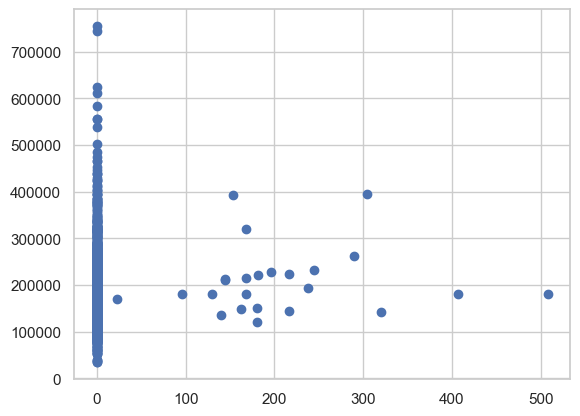

In [215]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=df_train)

### 2.3.30 cột ScreenPorch (Diện tích hiên có lưới - foot vuông)


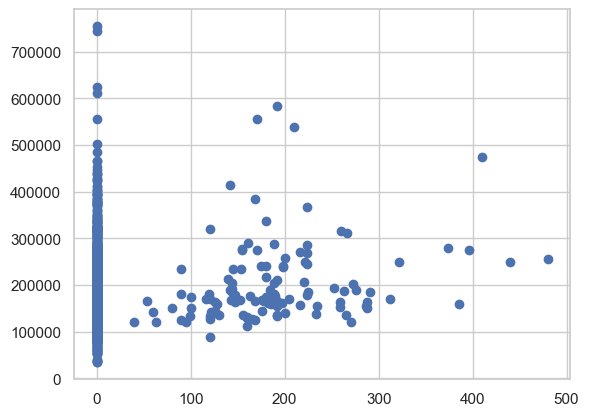

In [216]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=df_train)

### 2.3.31 cột PoolArea (Diện tích hồ bơi - foot vuông)

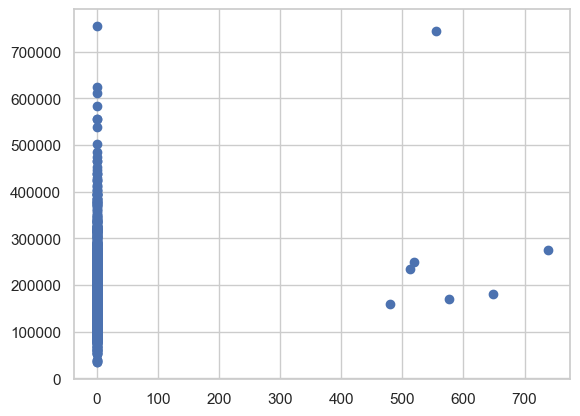

In [217]:
plt.scatter(x='PoolArea', y='SalePrice', data=df_train)

In [218]:
df_train.query('PoolArea > 500 & SalePrice > 700000')
# id 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## 2.4 Kết thúc quá trình kiểm tra các giá trị bất thường (outliers)

In [219]:
outlier_ids = [54, 186, 198, 250, 298, 314, 323, 336, 379, 496, 524, 598, 636, 692, 707, 739, 935, 955, 1062, 1183, 1299]

In [220]:
df_train_clean = df_train[df_train.Id.isin(outlier_ids) == False]

### in ra file train mới (train_clean.csv) đã làm sạch các Outliers 

In [221]:
# Kiểm tra chắc chắn
all_outliers_removed = len(df_train_clean[df_train_clean.Id.isin(outlier_ids)]) == 0
shape_changed = df_train_clean.shape[0] < df_train.shape[0]

print("thư mục train đã loại bỏ qua các giá trị outliers!")
print(f"   - Data mới: {df_train_clean.shape}")
print(f"   - Đã xóa: {df_train.shape[0] - df_train_clean.shape[0]} samples")


# Lưu file đã xóa outliers
df_train_clean.to_csv('../data/data_afterOutliersAnalysis/train_clean.csv', index=False)

# Lưu danh sách outliers đã xóa
removed_outliers = df_train[df_train.Id.isin(outlier_ids)]
removed_outliers.to_csv('../data/data_afterOutliersAnalysis/removed_outliers_details.csv', index=False)

print("Các thư mục đã lưu:")
print("   - train_clean.csv (data đã xóa outliers)") 
print("   - removed_outliers_details.csv (chi tiết outliers đã xóa)")

thư mục train đã loại bỏ qua các giá trị outliers!
   - Data mới: (1439, 81)
   - Đã xóa: 21 samples
Các thư mục đã lưu:
   - train_clean.csv (data đã xóa outliers)
   - removed_outliers_details.csv (chi tiết outliers đã xóa)


# 3. Kiểm tra giá trị thiếu (Missing Values Analysis) 

## 3.1 Liệt kê tất cả các cột có giá trị thiếu

### In ra tất cả các cột chứa giá trị thiếu

In [222]:
df_train_clean.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

PoolQC          1435
MiscFeature     1388
Alley           1350
Fence           1163
MasVnrType       861
FireplaceQu      685
LotFrontage      256
GarageQual        77
GarageFinish      77
GarageType        77
GarageYrBlt       77
GarageCond        77
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

### => Tổng cộng có 19 cột có giá trị thiếu và cột thiếu nhiều nhất là 1435 giá trị (PoolQC)

## 3.2 Phân tích và xử lý từng cột cụ thể

### *Trong phần này chúng tôi sẽ chủ yếu sử dụng dạng biểu đồ catplot. Bởi vì bản chất các dữ liệu phần này đều là categorical analysis rất phù hợp với cách biểu diễn của sơ đồ catplot, thấy được nhóm cột có missing pattern tương tự và biết cột nào cần xử lý trước*

### 3.2.1 cột MiscFeature (Tính năng phụ trợ)

#### Cụ thể, theo như mô tả từ Kaggle thì MiscFeature (tính năng phụ trợ) bao gồm
* Elev (Elevator): thang máy
* Gar2 (2nd Garage): nhà để xe thứ 2
* TenC (Tennis Court): sân Tennis
* Shed: nhà kho (trên 100 feet vuông)
* Othr (Other): tính năng khác
* NA (None): các cột thiếu </br>
*Các phần ở trên đều cho thấy sự giàu có và phong phú mà một ngôi nhà có thể có được, điều này cũng đồng nghĩa rất nhiều giá trì thiếu ở mục này (MiscFeature) sẽ làm ảnh hưởng rất nhiều đến giá nhà (SalePrice)*

In [223]:
# Kiểm tra các giá trị độc quyền của cột MiscFeature (Tính năng phụ trợ)
df_train_clean['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

trên kết quả kiểm tra, các giá trị xuất hiện trong cột MiscFeature này lại không có giá trị nào là 'Elev' (thang máy)

### 3.2.2 cột Alley (con đường hẻm)

In [224]:
# Kiểm tra các giá trị độc quyền của cột Alley (con đường hẻm)
df_train_clean['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [225]:
# điền giá trị cho missing value
df_train_clean['Alley'].fillna('No', inplace=True)
df_test['Alley'].fillna('No', inplace=True)

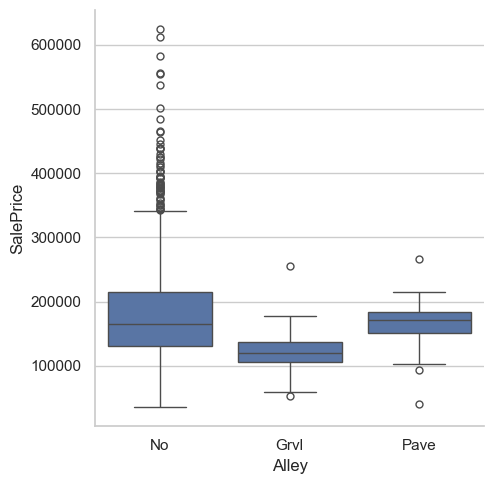

In [226]:
sns.catplot(data=df_train_clean, x="Alley", y="SalePrice", kind="box")

In [227]:
df_train_clean.query('Alley == "Pave"').count()

Id               39
MSSubClass       39
MSZoning         39
LotFrontage      37
LotArea          39
                 ..
MoSold           39
YrSold           39
SaleType         39
SaleCondition    39
SalePrice        39
Length: 81, dtype: int64

In [228]:
df_train_clean.query('Alley == "Grvl"').count()

Id               50
MSSubClass       50
MSZoning         50
LotFrontage      47
LotArea          50
                 ..
MoSold           50
YrSold           50
SaleType         50
SaleCondition    50
SalePrice        50
Length: 81, dtype: int64

### 3.2.3 cột Fence (frence quality - chất lượng hàng rào)

In [229]:
# Kiểm tra các giá trị độc quyền của cột Fence (chất lượng hàng rào)
df_train_clean['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [230]:
# điền giá trị cho missing value
df_train_clean['Fence'].fillna('No', inplace=True)
df_test['Fence'].fillna('No', inplace=True)

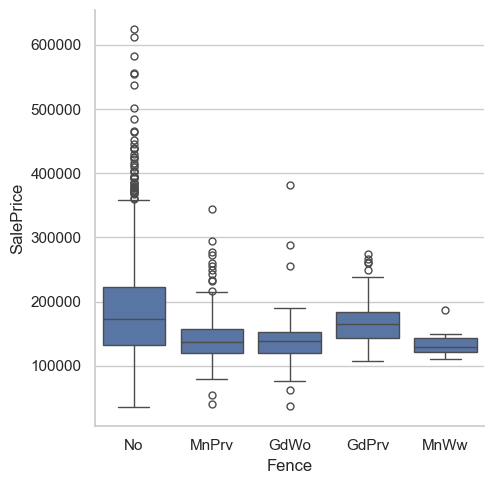

In [231]:
sns.catplot(data=df_train_clean, x="Fence", y="SalePrice", kind="box")

### 3.2.4 cột MasVnrType (Masonry veneer type - venner gạch)

In [232]:
df_train_clean['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [233]:
# điền giá trị cho missing value
mode_masvnr = df_train_clean['MasVnrType'].mode()[0]

# Điền giá trị này cho cả train và test
df_train_clean['MasVnrType'].fillna(mode_masvnr, inplace=True)
df_test['MasVnrType'].fillna(mode_masvnr, inplace=True)

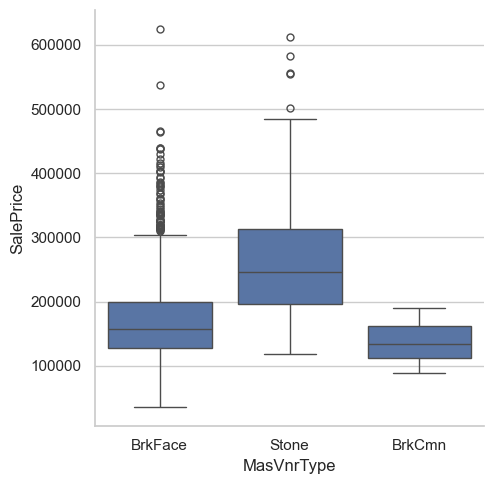

In [234]:
sns.catplot(data=df_train_clean, x="MasVnrType", y="SalePrice", kind="box")

### 3.2.5 cột MasVnrArea (venner đá)

In [235]:
# điền giá trị cho missing value (Missing rate rất thấp chỉ 8/1460 mẫu ~ 0.55% → Ảnh hưởng không đáng kể. Chúng ta có thể fill ngay)
df_train_clean['MasVnrArea'].fillna(0, inplace=True)
df_test['MasVnrArea'].fillna(0, inplace=True)

### 3.2.6 cột FireplaceQu (chất lượng lò sưởi)

In [236]:
df_train_clean['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [237]:
mode_value = df_train_clean['FireplaceQu'].mode()[0]

# Điền giá trị này cho cả train và test
df_train_clean['FireplaceQu'].fillna(mode_value, inplace=True)
df_test['FireplaceQu'].fillna(mode_value, inplace=True)

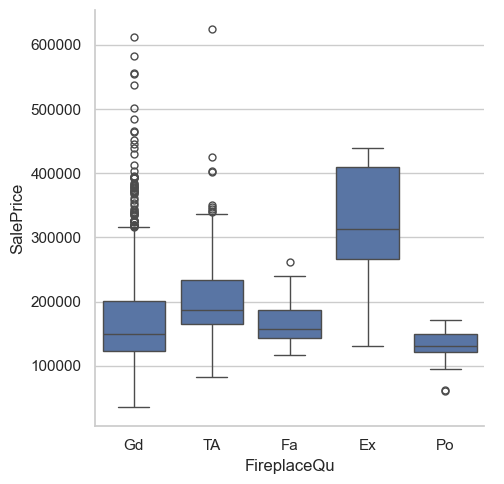

In [238]:
sns.catplot(data=df_train_clean, x="FireplaceQu", y="SalePrice", kind="box")

### 3.2.7 cột LotFrontage (mặt tiền)

In [239]:
df_train_clean['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114.,
       128., 149., 168., 182., 138., 152., 124., 153.,  46.])

Nếu ở đây chỉ đơn giản là cho các giá trị thiếu ở cột LotFrontage này thành '0' thì sẽ không hợp lý (mặt tiền của nhà không thể có độ rộng bằng 0), vì giá trị của LotFrontage là dạng số (numerical) feature, biểu diễn chiều dài mặt tiền của ngôi nhà, nên các giá trị là số thực, mang ý nghĩa đo lường vật lý, khác hoàn toàn so với các cột trước đó trong missing value được phân loại là (categorical). Vậy nên các cột NaN của mục này sẽ được xử lý riêng sau

#### Sử dụng phương pháp điền giá trị thiếu cho cột đặc trưng LotFrontage (mặt tiền ngôi nhà) bằng các giá trị trung vị (mean) của các ngôi nhà nằm cùng khu phố. 
#### Ý nghĩa của cách làm này là dựa trên giả định rằng các ngôi nhà trong cùng khu vực thường có đặc điểm lô đất tương đồng về kích thước và mặt tiền. Nhờ đó, giá trị được ước lượng sẽ hợp lý hơn, phản ánh đúng điều kiện thực tế của khu vực và giúp cho các mô hình học máy biết được mối quan hệ chính xác giữa đặc trưng địa lý và giá nhà.

In [240]:
df_train_clean['LotFrontage'] = df_train_clean.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

### 3.2.8 cột GarageYrBlt (năm xây dựng nhà để xe)

In [241]:
# so sánh tương quan giữa năm xây nhà và năm xây garage
df_train_clean['GarageYrBlt'].corr(df_train_clean['YearBuilt'])

np.float64(0.8290606692247209)

=> kết quả tương quan ở mức ổn (~0.83), tạm chấp nhận được cho mối quan hệ giữa thời điểm xây nhà và xây nhà để xe nhưng chưa chặt chẽ 

### 3.2.9 cột GarageCond (tình trạng của nhà để xe)

In [242]:
df_train_clean['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [243]:
# điền giá trị cho missing value
df_train_clean['GarageCond'].fillna('No', inplace=True)
df_test['GarageCond'].fillna('No', inplace=True)

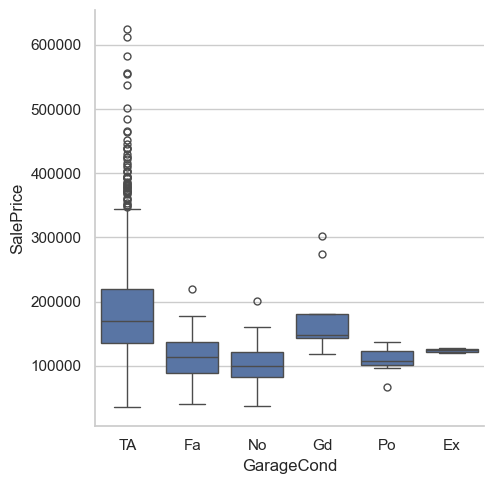

In [244]:
sns.catplot(data=df_train_clean, x="GarageCond", y="SalePrice", kind="box")

### 3.2.10 cột GarageType (loại nhà để xe)

In [245]:
df_train_clean['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [246]:
# điền giá trị cho missing value
df_train_clean['GarageType'].fillna('No', inplace=True)
df_test['GarageType'].fillna('No', inplace=True)

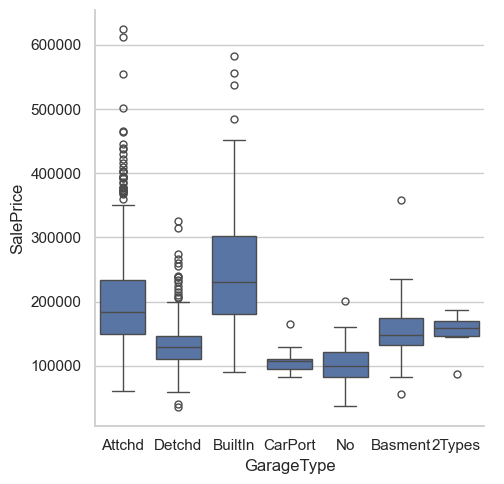

In [247]:
sns.catplot(data=df_train_clean, x="GarageType", y="SalePrice", kind="box")

### 3.2.11 cột GarageFinish (chất lượng hoàn thiện nhà để xe)

In [248]:
df_train_clean['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [249]:
# điền giá trị cho missing value
df_train_clean['GarageFinish'].fillna('No', inplace=True)
df_test['GarageFinish'].fillna('No', inplace=True)

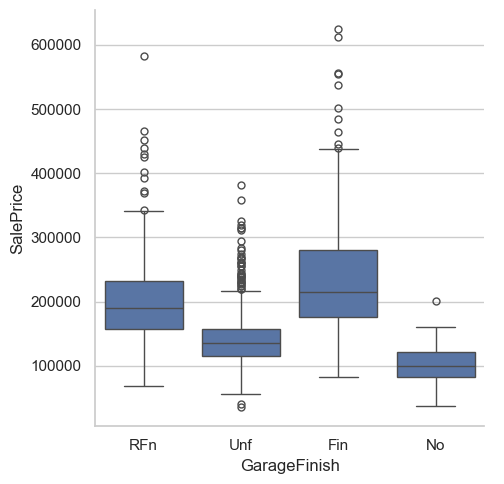

In [250]:
sns.catplot(data=df_train_clean, x="GarageFinish", y="SalePrice", kind="box")

### 3.2.12 cột GarageQual (chất lượng nhà để xe)

In [251]:
df_train_clean['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [252]:
df_train_clean['GarageQual'].fillna('No', inplace=True)
df_test['GarageQual'].fillna('No', inplace=True)

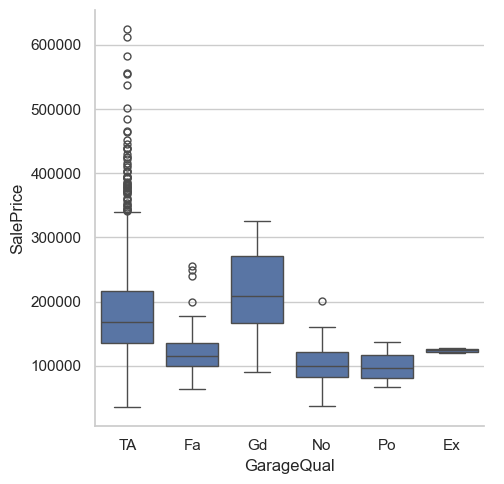

In [253]:
sns.catplot(data=df_train_clean, x="GarageQual", y="SalePrice", kind="box")

### 3.2.13 cột BsmtFinType2

In [254]:
df_train_clean['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [255]:
# fill các giá trị thiếu bằng Unf (unfinish - chưa xây dựng xong)
df_train_clean['BsmtFinType2'].fillna('Unf', inplace=True)
df_test['BsmtFinType2'].fillna('Unf', inplace=True)

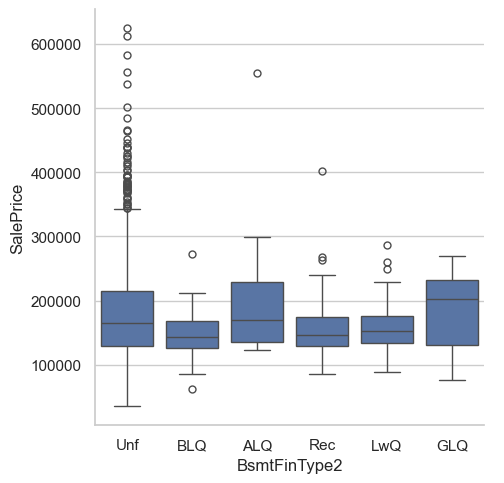

In [256]:
sns.catplot(data=df_train_clean, x="BsmtFinType2", y="SalePrice", kind="box")

### 3.2.14 cột BsmtExposure

In [257]:
df_train_clean['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [258]:
df_train_clean['BsmtExposure'].fillna('No', inplace=True)
df_test['BsmtExposure'].fillna('No', inplace=True)

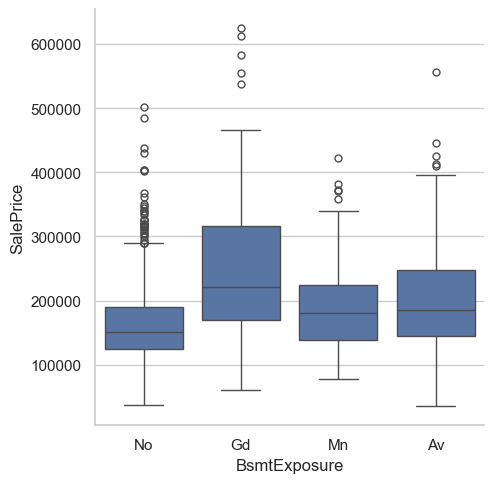

In [259]:
sns.catplot(data=df_train_clean, x="BsmtExposure", y="SalePrice", kind="box")

### 3.2.15 cột BsmtQual

In [260]:
df_train_clean['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [261]:
df_train_clean['BsmtQual'].fillna('No', inplace=True)
df_test['BsmtQual'].fillna('No', inplace=True)

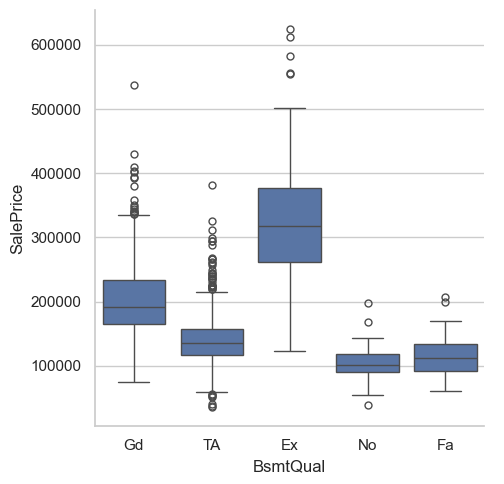

In [262]:
sns.catplot(data=df_train_clean, x="BsmtQual", y="SalePrice", kind="box")

### 3.2.16 cột BsmtCond

In [263]:
df_train_clean['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [264]:
df_train_clean['BsmtCond'].fillna('No', inplace=True)
df_test['BsmtCond'].fillna('No', inplace=True)

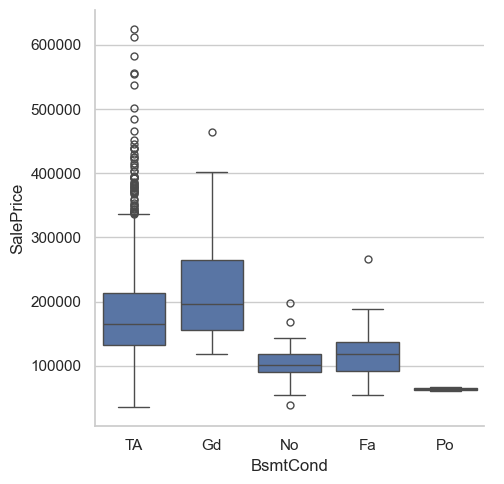

In [265]:
sns.catplot(data=df_train_clean, x="BsmtCond", y="SalePrice", kind="box")

### 3.2.17 cột BsmtFinType1

In [266]:
df_train_clean['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [267]:
df_train_clean['BsmtFinType1'].fillna('No', inplace=True)
df_test['BsmtFinType1'].fillna('No', inplace=True)

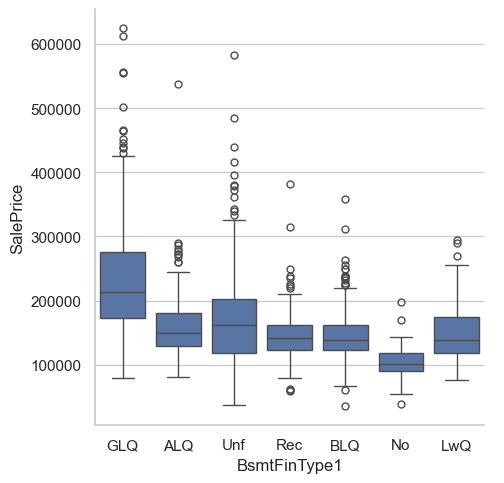

In [268]:
sns.catplot(data=df_train_clean, x="BsmtFinType1", y="SalePrice", kind="box")

### 3.2.18 cột Electrical

In [269]:
# cột này chỉ thiếu 1 giá trị nên ta sẽ lấy luôn dạng tiêu chuẩn cho nó để fill
df_train_clean['Electrical'].fillna('SBrkr', inplace=True)
df_test['Electrical'].fillna('SBrkr', inplace=True)

### 3.2.19 cột PoolQC

In [270]:
# vì cột này chưa nhiều missing value nhất nên chúng tôi kiểm tra với các giá trị khác NaN xem missing value chiếm bao nhiêu %
print("Các dòng có giá trị:", df_train_clean['PoolQC'].notna().sum())
print("Các dòng thiếu giá trị (missing value):", df_train_clean['PoolQC'].isna().sum())

Các dòng có giá trị: 4
Các dòng thiếu giá trị (missing value): 1435


=> dễ thấy rằng giá trị PoolQC gần như bị thiếu ở tất cả các cột (1435/1460) khoảng 98,29% missing value. Nên ta có thể bỏ qua cột dữ liệu này

#### Các cột phía dưới mang ít giá trị thiếu hơn nên có thể sử dụng các giá trị trung bình (mean) để fill luôn

### 3.2.20 cột MSZoning

In [271]:
df_train_clean['MSZoning'].fillna('No', inplace=True)
df_test['MSZoning'].fillna('No', inplace=True)

### 3.2.21 cột Functional

In [272]:
df_train_clean['Functional'].fillna('No', inplace=True)
df_test['Functional'].fillna('No', inplace=True)

### 3.2.22 cột Utilities

In [273]:
df_train_clean['Utilities'].fillna('No', inplace=True)
df_test['Utilities'].fillna('No', inplace=True)

### 3.2.23 cột BsmtUnfSF

In [274]:
median_bsmtunfsf = df_train_clean['BsmtUnfSF'].median()
df_train_clean['BsmtUnfSF'].fillna(median_bsmtunfsf, inplace=True)
df_test['BsmtUnfSF'].fillna(median_bsmtunfsf, inplace=True)

### 3.2.24 cột SaleType                  

In [275]:
df_train_clean['SaleType'].fillna('No', inplace=True)
df_test['SaleType'].fillna('No', inplace=True)

### 3.2.25 cột KitchenQual               

In [276]:
df_train_clean['KitchenQual'].fillna('No', inplace=True)
df_test['KitchenQual'].fillna('No', inplace=True)

### 3.2.26 cột Exterior2nd               

In [277]:
df_train_clean['Exterior2nd'].fillna('No', inplace=True)
df_test['Exterior2nd'].fillna('No', inplace=True)

### 3.2.27 cột Exterior1st               

In [278]:
df_train_clean['Exterior1st'].fillna('No', inplace=True)
df_test['Exterior1st'].fillna('No', inplace=True)

### 3.2.28 cột GarageCars                

In [279]:
median_garageCars = df_train_clean['GarageCars'].median()
df_train_clean['GarageCars'].fillna(median_garageCars, inplace=True)
df_test['GarageCars'].fillna(median_garageCars, inplace=True)

## 3.3 Loại bỏ các dữ liệu cột bị thiếu (Droping missing data) 

#### Từ phân tích ở phần trên (missing value) sau đây là các cột dữ liệu mà chúng tôi đề xuất loại bỏ để làm sạch tập dữ liệu, các cột bị loại bỏ thường có giá trị thiếu (missing value) rất cao đến hầu như không có giá trị nào trong tất cả các dòng hoặc gần như không mang lại giá trị quan trong nào làm ảnh hướng đến giá nhà (SalePrice)  

### Các cột loại bỏ bao gồm:
* PoolQC: 99.5% missing      → Hầu như không có pool
* MiscFeature: 96.3% missing → Hầu như không có tính năng đặc biệt
* Alley: 93.8% missing       → Hầu như không có alley
* Fence: 80.8% missing       → Đa số không có fence
* GarageYrBlt: 5.3% missing  → Có độ tương quan (correlation) với YearBuilt cao (~0.83) dẫn đến gần như nhà để xe gần như được xây dựng cùng thời điểm với ngôi nhà, đủ lý do để loại bỏ cột này vì dư thừa thông tin 
* GarageCond: 5.3% missing   → Thông tin dữ liệu gần như tương đồng với GarageQual (GarageCond - điều kiện nhà để xe; GarageQual - chất lượng nhà để xe), cả hai biến đo lường gần như cùng một thứ
* BsmtFinType2: 2.6% missing → Ít quan trọng hơn BsmtFinType1 (mức độ hoàn thiện tầng hầm loại 1), bởi lẽ các giá trị ở cột đa số mang giá trị là 'Unf' - Unfinished (chưa hoàn thiện), vậy nên các giá trị cột BsmtFinType2 gần như giống với NaN, nên không ảnh hướng trực tiếp đến giá nhà (SalePrice)

### Các cột được giữ lại bao gồm:
* FireplaceQu                → Chất lượng lò sưởi (feature quan trong với SalePrice), giá trị thiếu 686/1460 sau khi đã loại bỏ các Outliers
* LotFrontage                → Chiều dài mặt tiền, giá trị thiếu 256/1460 sau khi đã loại bỏ các Outliers
* Các cột Basement features  → Đều là các cột dữ liệu quan trong và ít giá trị thiếu, cụ thể
    * BsmtQual: 2.5% missing      → Chất lượng tầng hầm
    * BsmtCond: 2.5% missing      → Điều kiện tầng hầm  
    * BsmtExposure: 2.6% missing  → Độ phơi sáng tầng hầm → ít quan trọng hơn nhưng missing value thấp → giữ lại
    * BsmtFinType1: 2.5% missing  → Loại hoàn thiện chính
* Các cột Garage features    → Chỉ trừ các cột GarageYrBlt và GarageCond là 2 cột dữ liệu bị loại bỏ, còn lại các thuộc tính khác đều mang lượng giá trị thiếu rất ít hoặc rất quan trong để có thể bỏ, cụ thể:
    * GarageType: 5.3%     → Loại nhà để xe
    * GarageFinish: 5.3%   → Mức độ hoàn thiện 
    * GarageQual: 5.3%     → Chất lượng → Giữ lại (tốt hơn GarageCond)
* MasVnrArea           → chỉ có 8 giá trị thiếu có thể ước tính giá trị thiếu (impute) dễ dàng
* Electrical           → chỉ có 1 giá trị thiếu đã fill

In [280]:
# loại bỏ các cột
df_train_clean = df_train_clean.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
df_test = df_test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [281]:
# Xuất ra file CSV mới
df_train_clean.to_csv("../data/data_afterMVAnalysis/train_clean_rmMV.csv", index=False)

print("Đã lưu thành công thư mục train_clean_rmMV.csv")

Đã lưu thành công thư mục train_clean_rmMV.csv


### Kiểm tra missing value một lần nữa trong tập test

In [282]:
# Tạo bản copy và điền missing values
df_test_clean = df_test.copy()

# Điền trung vị cho cột Number
numeric_cols = df_test_clean.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df_test_clean[col].isnull().any():
        median_val = df_test_clean[col].median()
        df_test_clean[col].fillna(median_val, inplace=True)
# Điền 'No' cho cột Object  
object_cols = df_test_clean.select_dtypes(include=['object']).columns
for col in object_cols:
    if df_test_clean[col].isnull().any():
        df_test_clean[col].fillna('No', inplace=True)

In [283]:
# Xuất ra file CSV mới
df_test_clean.to_csv("../data/data_afterMVAnalysis/test_clean_rmMV.csv", index=False)

print("Đã lưu thành công thư mục test_clean_rmMV.csv")

Đã lưu thành công thư mục test_clean_rmMV.csv


# 4. Các kĩ thuật tạo đặc trưng (Feature Enginnering)

#### Sau khi xem xét và loại bỏ các đặc trưng dữ thừa, chúng tôi quyết định tạo thêm các đặc trưng mới dựa trên các đặc trưng còn lại trong bộ dữ liệu (tên cột đặc trưng mới được note ở đầu các cell)

## 4.1 Tạo các đặc trưng mới

In [284]:
# Tuổi của ngôi nhà (năm bán - năm xây)
df_train_clean['houseage'] = df_train_clean['YrSold'] - df_train_clean['YearBuilt']
df_test['houseage'] = df_test['YrSold'] - df_test['YearBuilt']

In [285]:
# Tuổi kể từ lần sửa chữa gần nhất (năm bán - năm sửa)
df_train_clean['houseremodelage'] = df_train_clean['YrSold'] - df_train_clean['YearRemodAdd']
df_test['houseremodelage'] = df_test['YrSold'] - df_test['YearRemodAdd']

In [286]:
# Tổng diện tích sàn (tầng 1 + tầng 2 + tầng hầm hoàn thiện)
df_train_clean['totalsf'] = (
    df_train_clean['1stFlrSF'] + df_train_clean['2ndFlrSF'] + df_train_clean['BsmtFinSF1'] + df_train_clean['BsmtFinSF2']
)

df_test['totalsf'] = (
    df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']
)

In [287]:
# Tổng diện tích sử dụng (gồm diện tích sống và diện tích tầng hầm)
df_train_clean['totalarea'] = (
    df_train_clean['GrLivArea'] + df_train_clean['TotalBsmtSF']
)

df_test['totalarea'] = (
    df_test['GrLivArea'] + df_test['TotalBsmtSF']
)

In [288]:
# Tổng phòng tắm
df_train_clean['totalbath'] = (
    df_train_clean['FullBath'] + df_train_clean['BsmtFullBath'] 
                               + 0.5 * (df_train_clean['HalfBath'] + df_train_clean['BsmtHalfBath'])
)

df_test['totalbath'] = (
    df_test['FullBath'] + df_test['BsmtFullBath'] 
                               + 0.5 * (df_test['HalfBath'] + df_test['BsmtHalfBath'])
)

In [289]:
# Tổng diện tích các loại hiên nhà (porches)
df_train_clean['totalporchsf'] = (
    df_train_clean['OpenPorchSF'] + df_train_clean['3SsnPorch'] +
    df_train_clean['EnclosedPorch'] + df_train_clean['ScreenPorch']
)

df_test['totalporchsf'] = (
    df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
    df_test['EnclosedPorch'] + df_test['ScreenPorch']
)

## 4.2 Tiếp tục loại bỏ các cột dữ liệu cũ sau khi đã biến đổi

#### Sau khi chúng tôi tối ưu lại các feature bằng cách gộp và biến đổi các cột cũ để tạo ra các cột giá trị mới (như houseage, totalsf, totalporchsf, ...). Chúng tôi quyết định bỏ qua các cột dữ liệu cũ:
* YrSold         
* YearBuilt
* YearRemodAdd   
* 1stFlrSF       
* 2ndFlrSF       
* BsmtFinSF1     
* BsmtFinSF2     
* GrLivArea      
* TotalBsmtSF   
* FullBath       
* BsmtFullBath   
* HalfBath       
* BsmtHalfBath   
* OpenPorchSF    
* 3SsnPorch      
* EnclosedPorch  
* ScreenPorch

#### Từ đó tạo ra các feature mới sau:
* houseage	       → Tuổi của ngôi nhà = YrSold - YearBuilt
* houseremodelage  → Số năm kể từ khi nhà được sửa chữa = YrSold - YearRemodAdd
* totalsf	       → Tổng diện tích sàn = 1stFlrSF + 2ndFlrSF + BsmtFinSF1
* totalarea	       → Tổng diện tích sử dụng (tầng + tầng hầm) = GrLivArea + TotalBsmtSF
* totalbath	       → Tổng số phòng tắm = FullBath + HalfBath x 0.5 + BsmtFullBath + BsmtHalfBath x 0.5
* totalporchsf	   → Tổng diện tích hiên = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch

In [290]:
# loại bỏ các cột
df_train_clean = df_train_clean.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                              'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'BsmtFullBath',
                                              'HalfBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])

df_test = df_test.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                              'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'BsmtFullBath',
                                              'HalfBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])

# lỗi hiển thị phía dưới cho thấy rằng các cột đã được xoá thành công (nên không còn giá trị cột nào trong này có thể xoá được nữa)

#### sau khi drop các cột trên, sau đây chúng tôi có một bản đồ heatmap biểu diễn mối quan hệ giữa target và các features còn lại

<Axes: >

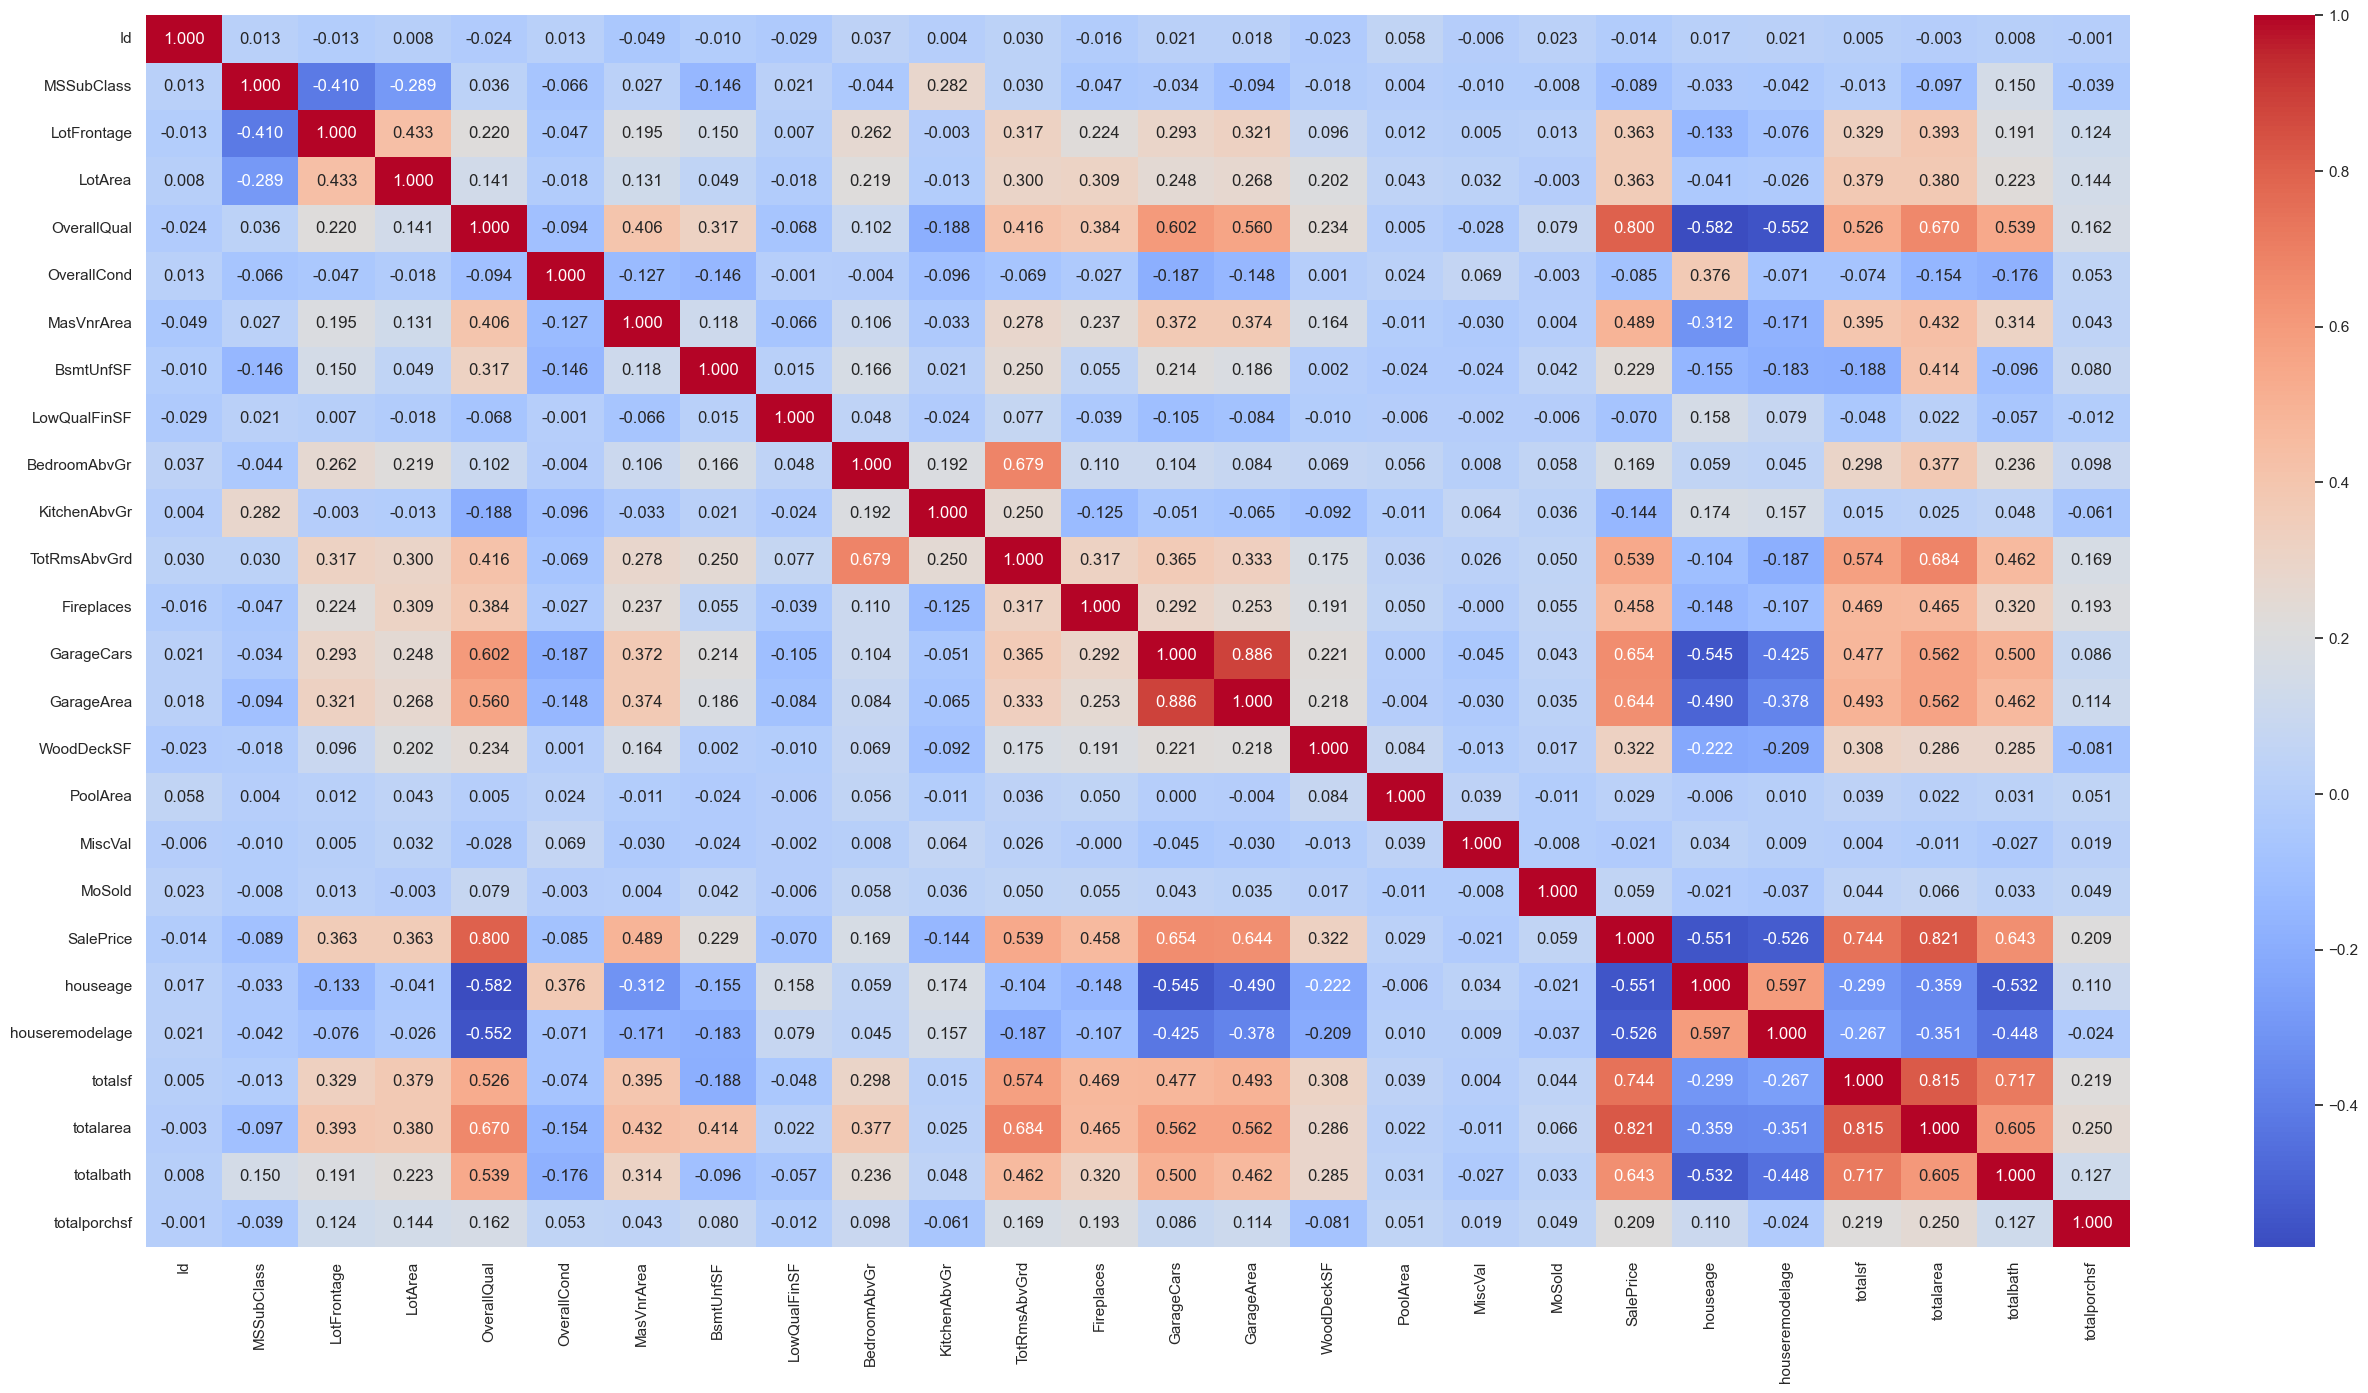

In [291]:
correlation_matrix = df_train_clean.corr(numeric_only=True)
plt.figure(figsize=(32,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")

#### Dễ thấy từ biểu đồ heatmap trên có hai cột đa cộng tuyến cao là GarageArea và GarageCars. Cụ thể ở cả hai đối tượng này có độ tương quan rất cao (~0.886) điều này nghĩa là cả hai cột này có thể đang biểu diễn các giá trị gần như tương đương nhau. Điều này rất có khả năng sẽ vi phạm giả định của nhiều mô hình ML về tính độc lập của features. Nên chúng tôi quyết định loại bỏ một trong hai cột này. 
#### Cụ thể chúng tôi quyết định loại bỏ (drop) cột GarageArea, đơn giản vì trong thực tế, người mua nhà muốn quan tâm "garage đậu được bao nhiêu xe" hơn là "diện tích garage bao nhiêu", vế đầu chắc chắn trực quan và thực tế hơn.


In [292]:
# so sánh tương quan giữa diện tích nhà để xe và số lượng xe có thể chứa
df_train_clean['GarageArea'].corr(df_train_clean['GarageCars'])

np.float64(0.8862579508217647)

In [293]:
df_train_clean = df_train_clean.drop(columns=['GarageArea'])
df_test = df_test.drop(columns=['GarageArea'])

### Bên cạnh việc loại bỏ các cột có độ tương quan cao, chúng tôi quyết định xem xét kiểm tra giá trị thiếu của nhưng đặc trưng mới tạo thêm một lần nữa, và sử dụng các giá trị trung binh (mean) để fill lại, vì khi này các giá trị đã tương đối chính xác hơn các đặc trưng cũ đã biến đổi 

In [ ]:
# kiểm tra giá trị thiếu
missing_train = df_train_clean.isnull().sum()
missing_train = missing_train[missing_train > 0]

missing_test = df_test.isnull().sum()
missing_test = missing_test[missing_test > 0]

# gộp 2 danh sách missing value
missing_cols = list(set(missing_train.index).union(set(missing_test.index)))

print(f"Các cột có giá trị thiếu từ cả hai file train và test: {missing_cols}")

Các cột có giá trị thiếu từ cả hai file train và test: ['totalbath', 'totalsf', 'totalarea']


In [ ]:
# fill các giá trị thiếu của các đặc trưng mới bằng giá trị trung bình (mean)
for col in missing_cols:
    mean_value = df_train_clean[col].mean()
    df_train_clean[col].fillna(mean_value, inplace=True)
    df_test[col].fillna(mean_value, inplace=True)

In [296]:
# kiểm tra lại sau khi fill
missing_train = df_train_clean.isnull().sum()
missing_train = missing_train[missing_train > 0]

missing_test = df_test.isnull().sum()
missing_test = missing_test[missing_test > 0]

# gộp 2 danh sách missing value
missing_cols = list(set(missing_train.index).union(set(missing_test.index)))

print(f"Các cột có giá trị thiếu từ cả hai file train và test: {missing_cols}")

Các cột có giá trị thiếu từ cả hai file train và test: []


### => Không chứa giá trị thiếu nào nữa ! 

#### Tổng quan giá nhà sau khi Feature Enginnering 

<Axes: xlabel='SalePrice', ylabel='Count'>

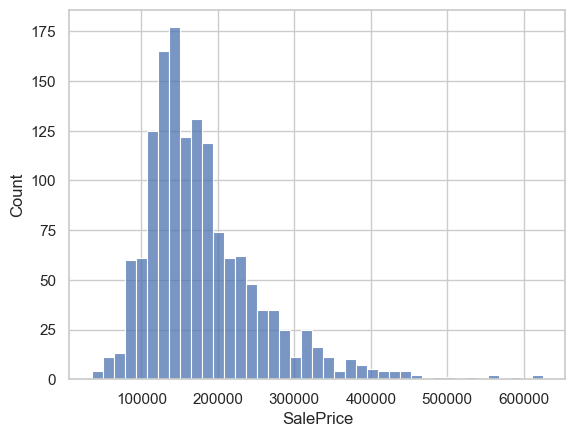

In [297]:
# biểu diễn bằng biểu đồ histplot
sns.histplot (
    df_train_clean,
    x = df_train_clean['SalePrice']
)

=> dữ liệu bị lệch phải

In [298]:
# áp dụng biến đổi logarit cho biểu đồ phân bố dễ quan sát hơn 
import numpy as np
df_train_clean['SalePrice'] = np.log1p(df_train_clean['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

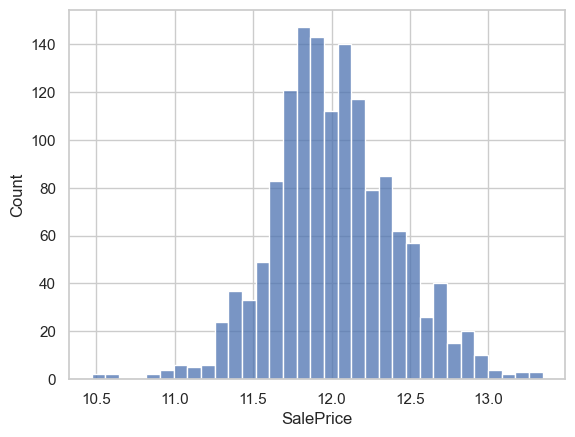

In [299]:
# biểu đồ sau khi áp dụng biến đổi logarit (log transformation)
sns.histplot (
    df_train_clean,
    x = df_train_clean['SalePrice']
)

### In ra 2 tập dữ liệu test và train sau bước FE

In [300]:
df_test.to_csv("../data/data_withFE/test_new.csv", index=False)
df_train_clean.to_csv("../data/data_withFE/train_new.csv", index=False)

In [301]:
!jupyter nbconvert --to html "eda.ipynb"

[NbConvertApp] Converting notebook eda.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 85 image(s).
[NbConvertApp] Writing 3377486 bytes to eda.html


# Kết thúc